In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the DataSet

Let us first import NumPy and Pandas and read the given housing data

In [2]:
housingData = pd.read_csv('train.csv')

In [3]:
housingData.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
housingData.shape

(1460, 81)

In [5]:
housingData.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

#### Checking data quality, specially if there are null entries to be cleaned up

In [6]:
housingData.info()
# Below data shows there are columns with null content, so we would need to clean or fill them up

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Step 2: Data Cleanup

In [7]:
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 82

In [8]:
round(housingData.isnull().mean()*100, 2) #check the percentage of empty/NaN data in each column

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType       59.73
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [9]:
# Reusable function to only print columns with null values for ease of analysis
def printNullCols(housingData):
    empty = housingData.isnull().sum()/len(housingData)*100
    empty = empty[empty>0]
    empty.sort_values(inplace=True, ascending=False)
    return empty

In [10]:
printNullCols(housingData)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [11]:
housingData['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

#### We usually drop columns with >80% null/NaN values but in this case, as per the data dictionary, null/NaN values in most of these column represent missing facility which may impact housing prices. 
#### Hence, we should replace null/NAN in these categorical columns with 'None' instead of dropping them


In [12]:
catColumnsWithNull = ["Alley", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "BsmtQual", "Fence", "FireplaceQu", "GarageCond", "GarageFinish", "GarageQual", "GarageType", "MasVnrType", "MiscFeature", "PoolQC"]
for col in catColumnsWithNull:
    housingData[col].fillna("none", inplace=True)

In [13]:
# Checking leftover null columns
printNullCols(housingData)

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [14]:
# Now lets analyse these columns further
housingData['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [15]:
housingData['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [16]:
housingData['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

##### `Electrical` column has very few nulls so we can drop those rows
##### For other 3 columns, it seems safe to fill those with median values

In [17]:
housingData=housingData[housingData["Electrical"].notna()]

In [18]:
for col in ["LotFrontage","GarageYrBlt","MasVnrArea"] :
    housingData[col].fillna(housingData[col].median(), inplace=True)

In [19]:
# Checking latest data sanity state
housingData.shape

(1459, 81)

In [20]:
# Verifying that no more null data present
printNullCols(housingData)

Series([], dtype: float64)

In [21]:
# Checking for any outliers in numeric dataset
housingData.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1459.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    730.054832    56.881426    69.861549   10517.363948     6.100069   
std     421.411181    42.310746    22.035077    9984.666267     1.383171   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.500000    20.000000    60.000000    7549.000000     5.000000   
50%     730.000000    50.000000    69.000000    9477.000000     6.000000   
75%    1094.500000    70.000000    79.000000   11603.000000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000   
mean      5.575737  1971.244003   1984.850583   103.187800   443.943797   
std       1.113079    30.199555     20.644343   180.773158   456.106417   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   384.000000   
75%       6.000000  2000.000000   2004.000000   164.500000   712.500000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1459.000000  1459.000000  1459.000000  1459.000000  1459.000000   
mean     46.581220   567.366004  1057.891021  1162.906785   346.791638   
std     161.369977   441.992392   438.500975   386.572089   436.610637   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   796.000000   882.000000     0.000000   
50%       0.000000   479.000000   992.000000  1088.000000     0.000000   
75%       0.000000   808.000000  1298.500000  1391.500000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1459.000000  1459.000000   1459.000000   1459.000000  1459.000000   
mean       5.848526  1515.546950      0.425634      0.057574     1.564770   
std       48.639512   525.650927      0.518969      0.238830     0.550987   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.000000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1777.500000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1459.000000   1459.000000   1459.000000   1459.000000  1459.000000   
mean      0.382454      2.866347      1.046607      6.517478     0.613434   
std       0.502798      0.816050      0.220410      1.625902     0.644687   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1459.000000  1459.000000  1459.000000  1459.000000  1459.000000   
mean   1978.569568     1.766964   473.030158    94.240576    46.692255   
std      23.993708     0.747546   213.869604   125.381679    66.267472   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1962.000000     1.000000   333.000000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2001.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [22]:
# LotArea seems to be showing outliers as the value gap between 75th percentile & max is very high. Lets check further & remove outliers
housingData['LotArea'].describe(percentiles=[.98,.99,.9999,.99999]) 

count       1459.000000
mean       10517.363948
std         9984.666267
min         1300.000000
50%         9477.000000
98%        25255.440000
99%        37593.680000
99.99%    207869.707000
100%      214507.470700
max       215245.000000
Name: LotArea, dtype: float64

In [23]:
housingData = housingData[housingData['LotArea'] <= 50000] #Removing outliers

In [24]:
housingData['LotArea'].describe(percentiles=[.98,.99,.9999,.99999]) 

count      1448.000000
mean       9867.971685
std        4579.880744
min        1300.000000
50%        9444.500000
98%       21785.520000
99%       26161.080000
99.99%    46445.891700
100%      46574.689170
max       46589.000000
Name: LotArea, dtype: float64

In [25]:
housingData.shape # checking latest data size as we should not remove much data from this already small set

(1448, 81)

In [26]:
# Dropping ID columns as it is just depicting row number & has no relation to price
housingData = housingData.drop(['Id'], axis=1)
housingData.shape

(1448, 80)

## Step 3: Visualising & Preparing the Data

### Visualisation
Let's now spend some time - **understanding the data**. This is a key step that heps identifying :
- Some predictors directly having a strong association with the outcome variable
- Any obvious multicollinearity going on

### Preparation
We will convert categorical variable into dummy variables in order to fir a regression line

We'll visualise & prepare our data using libraries - `matplotlib` and `seaborn`.



In [27]:
# We will business knowledge to visualise certain important categorical variables against housing price
# "OverallCond", "LotArea", "Neighborhood", "HouseStyle", "OverallQual", "Heating", "CentralAir", "Electrical", "GarageType"]

In [28]:
# Defining a common method to draw plots against housing price

def checkDefaultRateFor(attribute):
    sns.set(font_scale=2) 
    plt.figure(figsize=(30,30))
    plt.subplot(221)
    sns.barplot(x=attribute, y="SalePrice", data=housingData, palette=("deep"))  
    # Defaults across given attribute
    plt.subplot(222) 
    sns.boxplot(x=attribute, y='SalePrice', data=housingData, palette="deep")


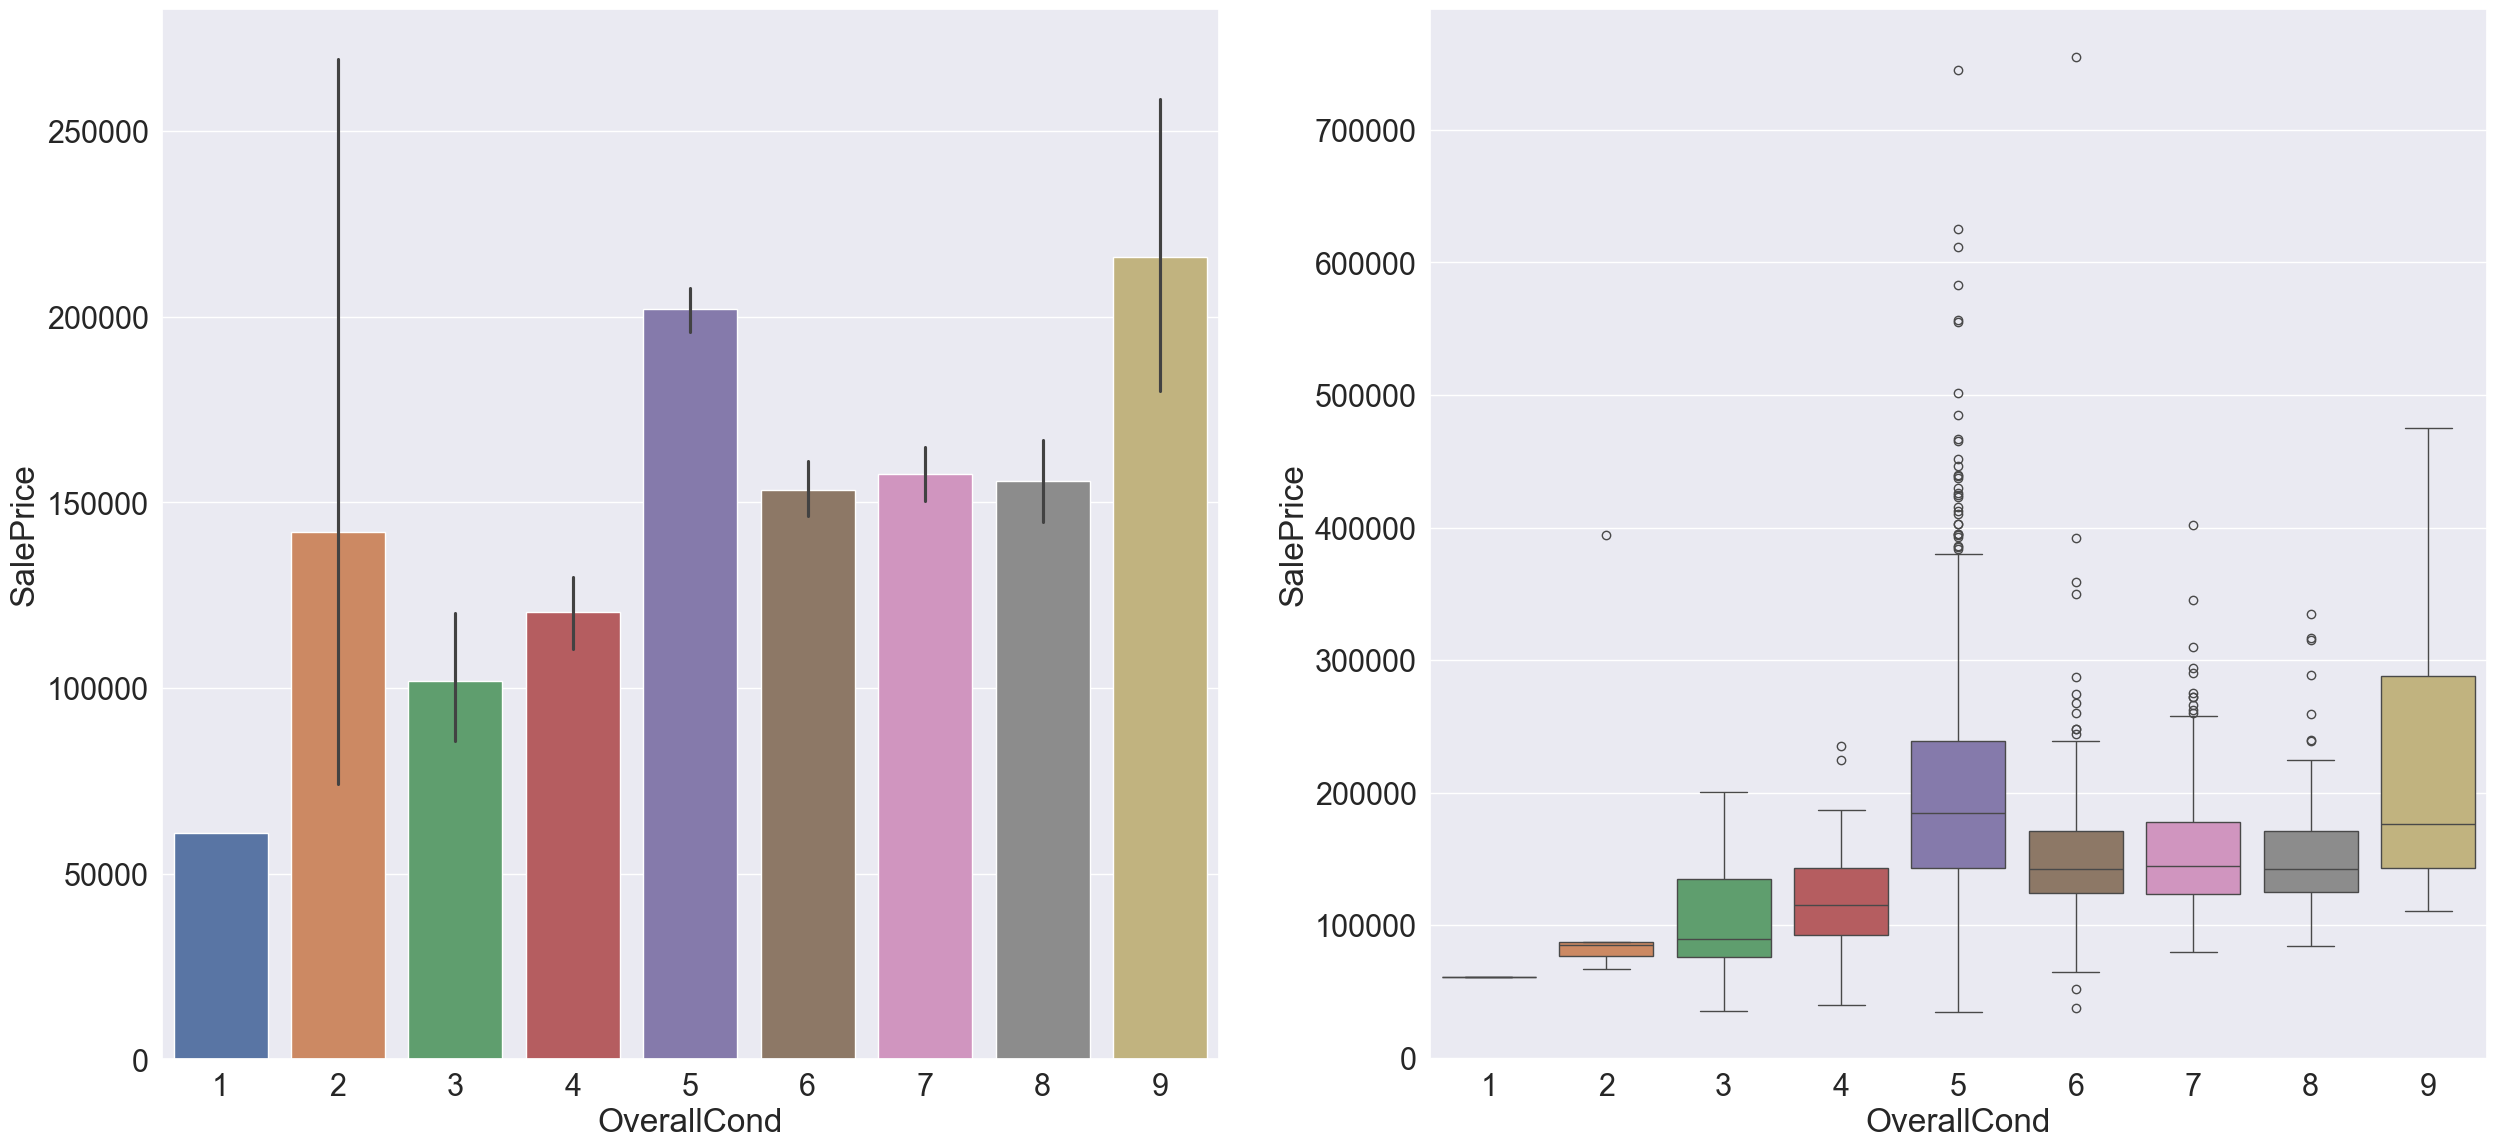

In [29]:
checkDefaultRateFor("OverallCond")
# Below graph indicates that below average condition potentially leads to low sales price. 
# 'Average' & 'Excellent' condition have higher sales price. 

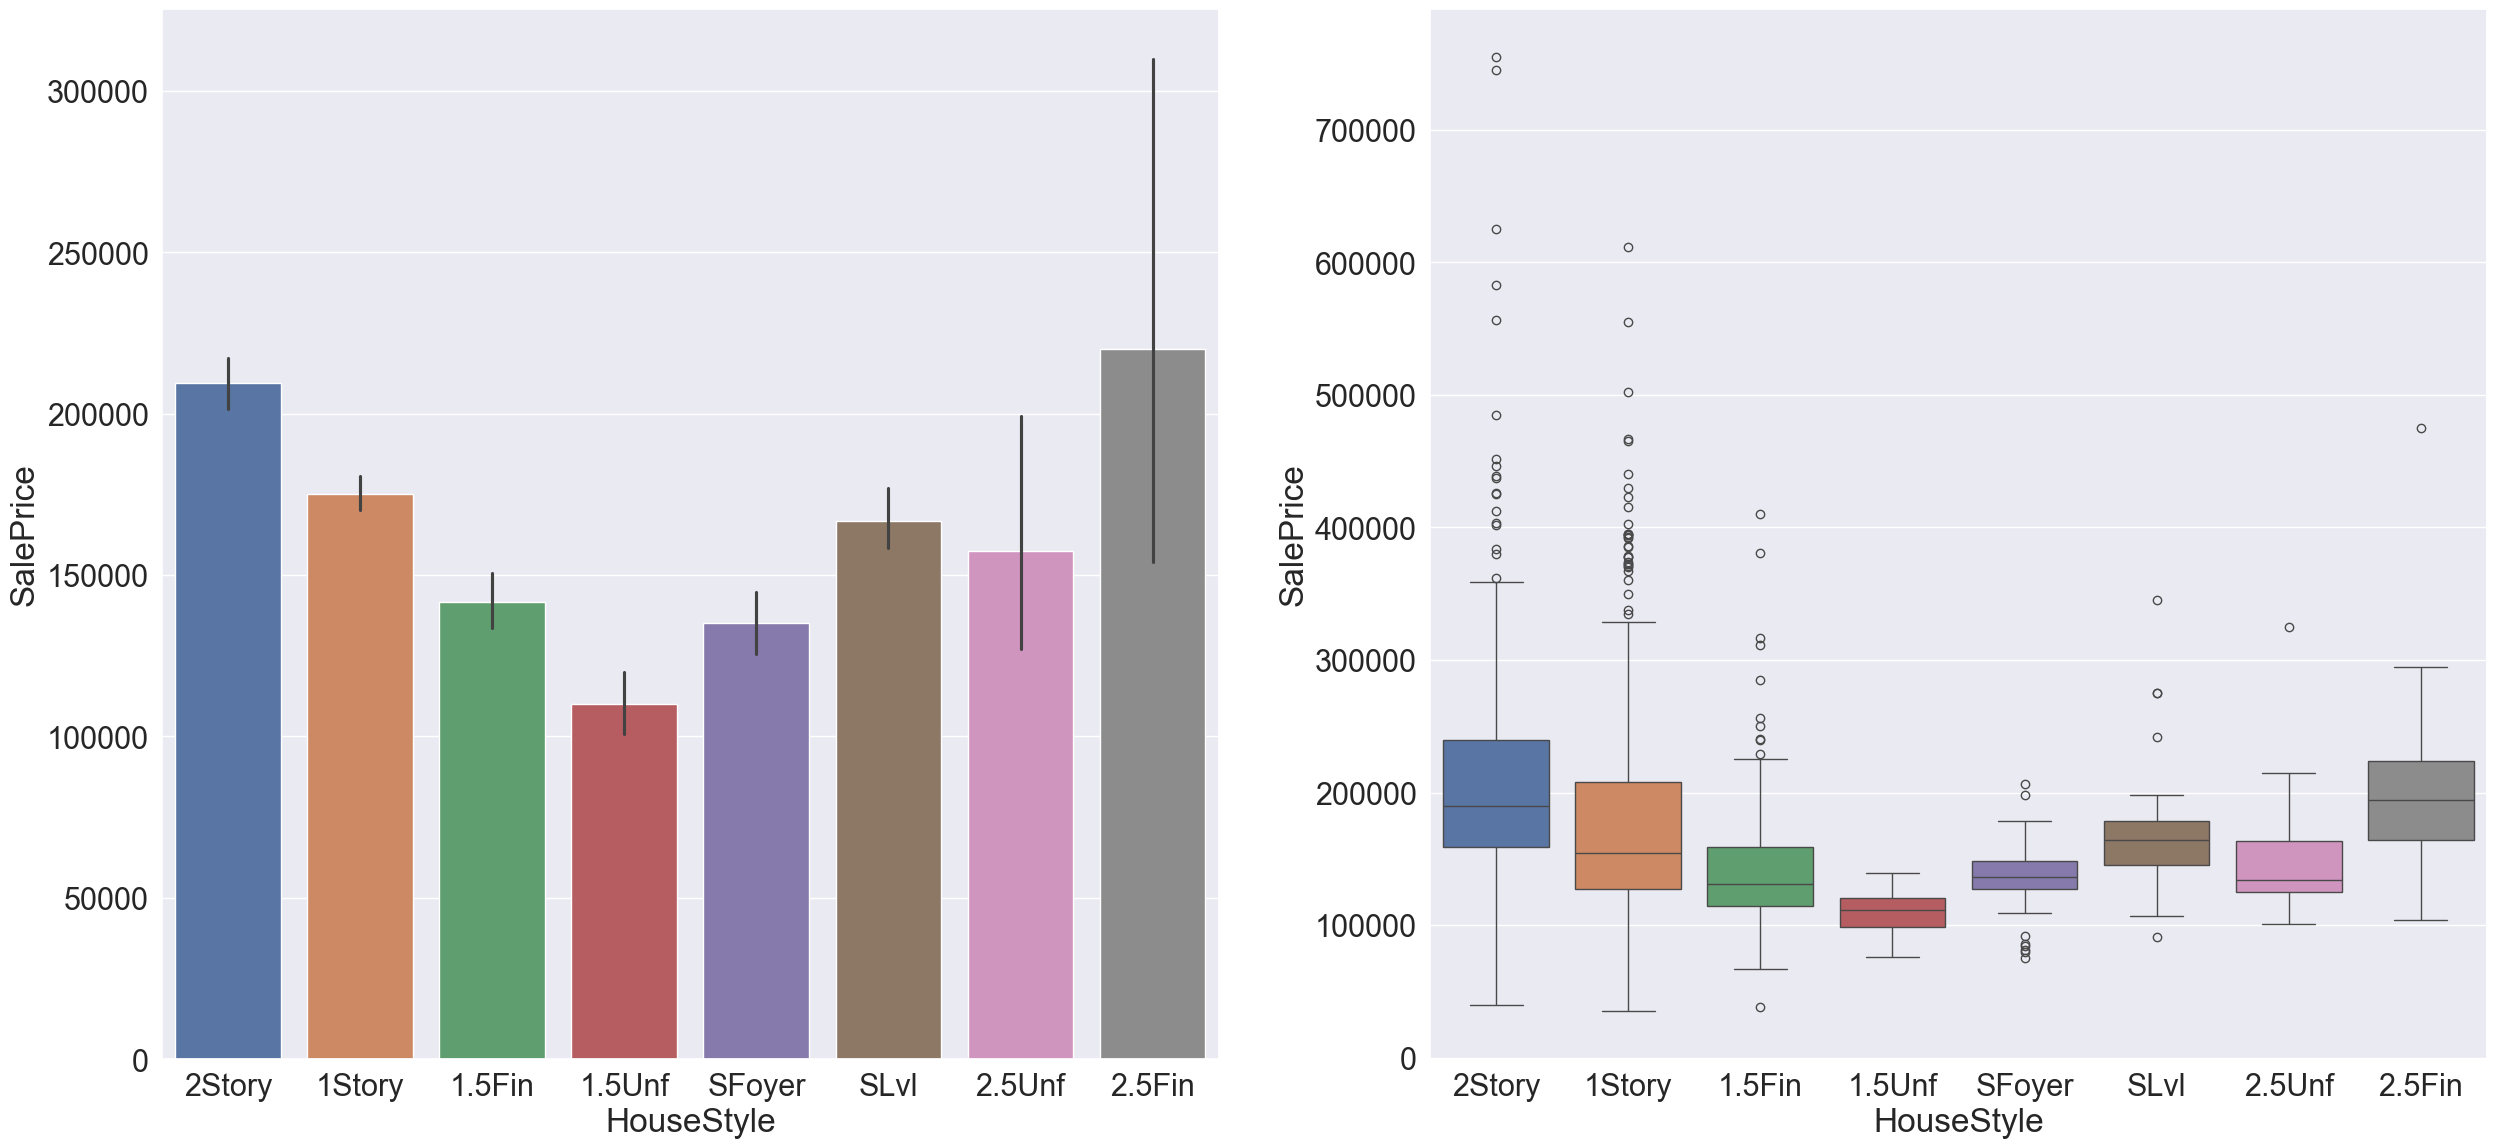

In [30]:
checkDefaultRateFor("HouseStyle")
# Below graph indicates that HouseStyle has impact on sales price 
# 2Story & 2.5Fin houses fetch more price

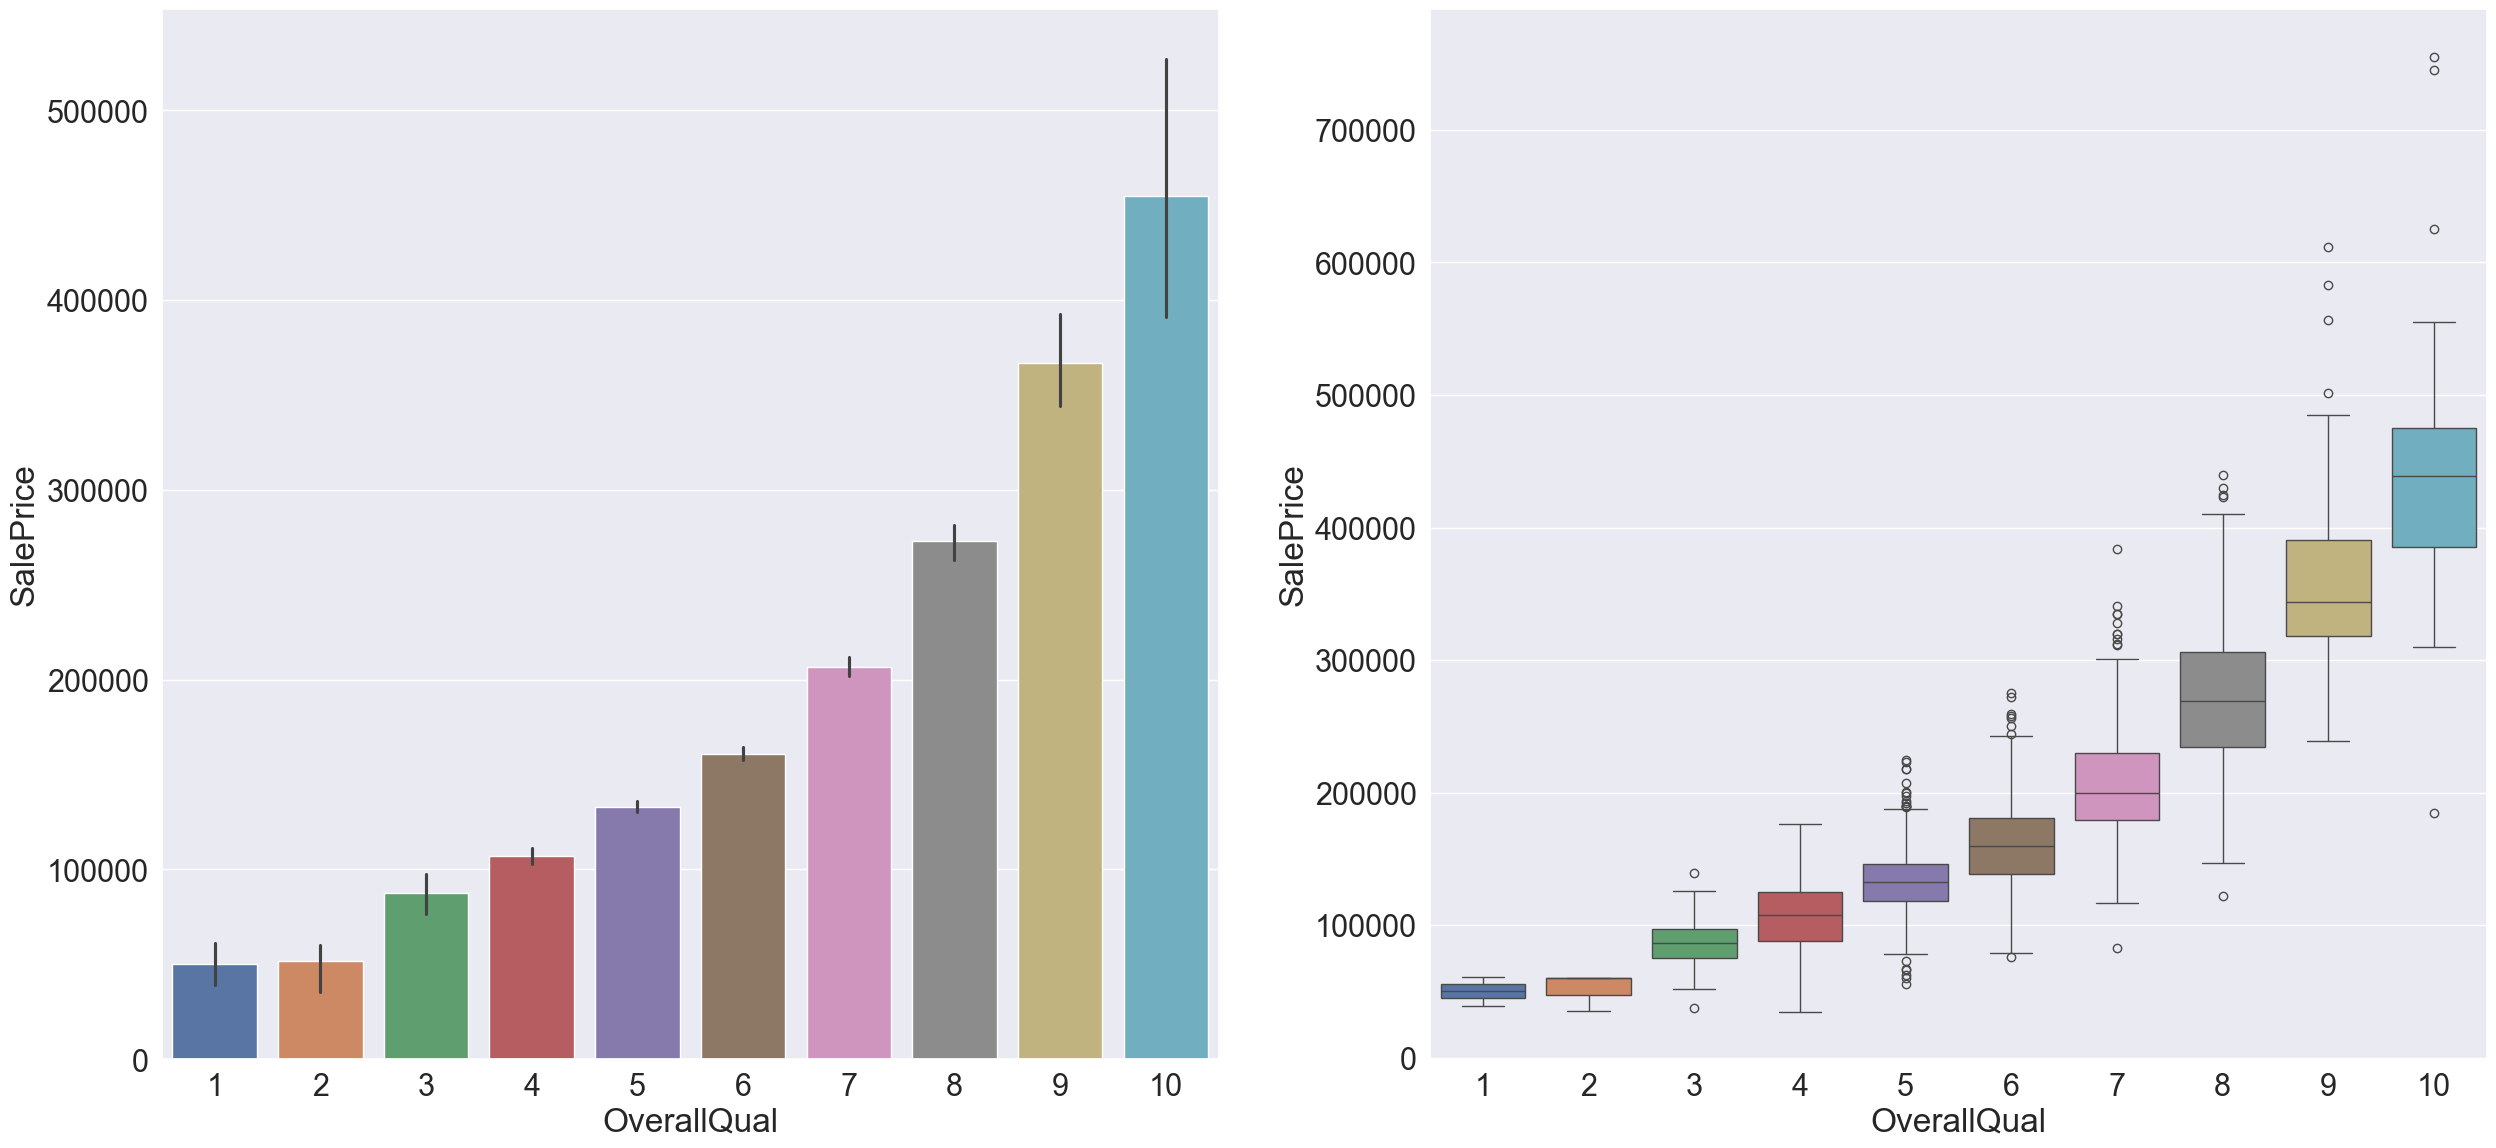

In [31]:
checkDefaultRateFor("OverallQual")
# OverallQual shows a high corelation with housing price. Better the overall quality, higher the price

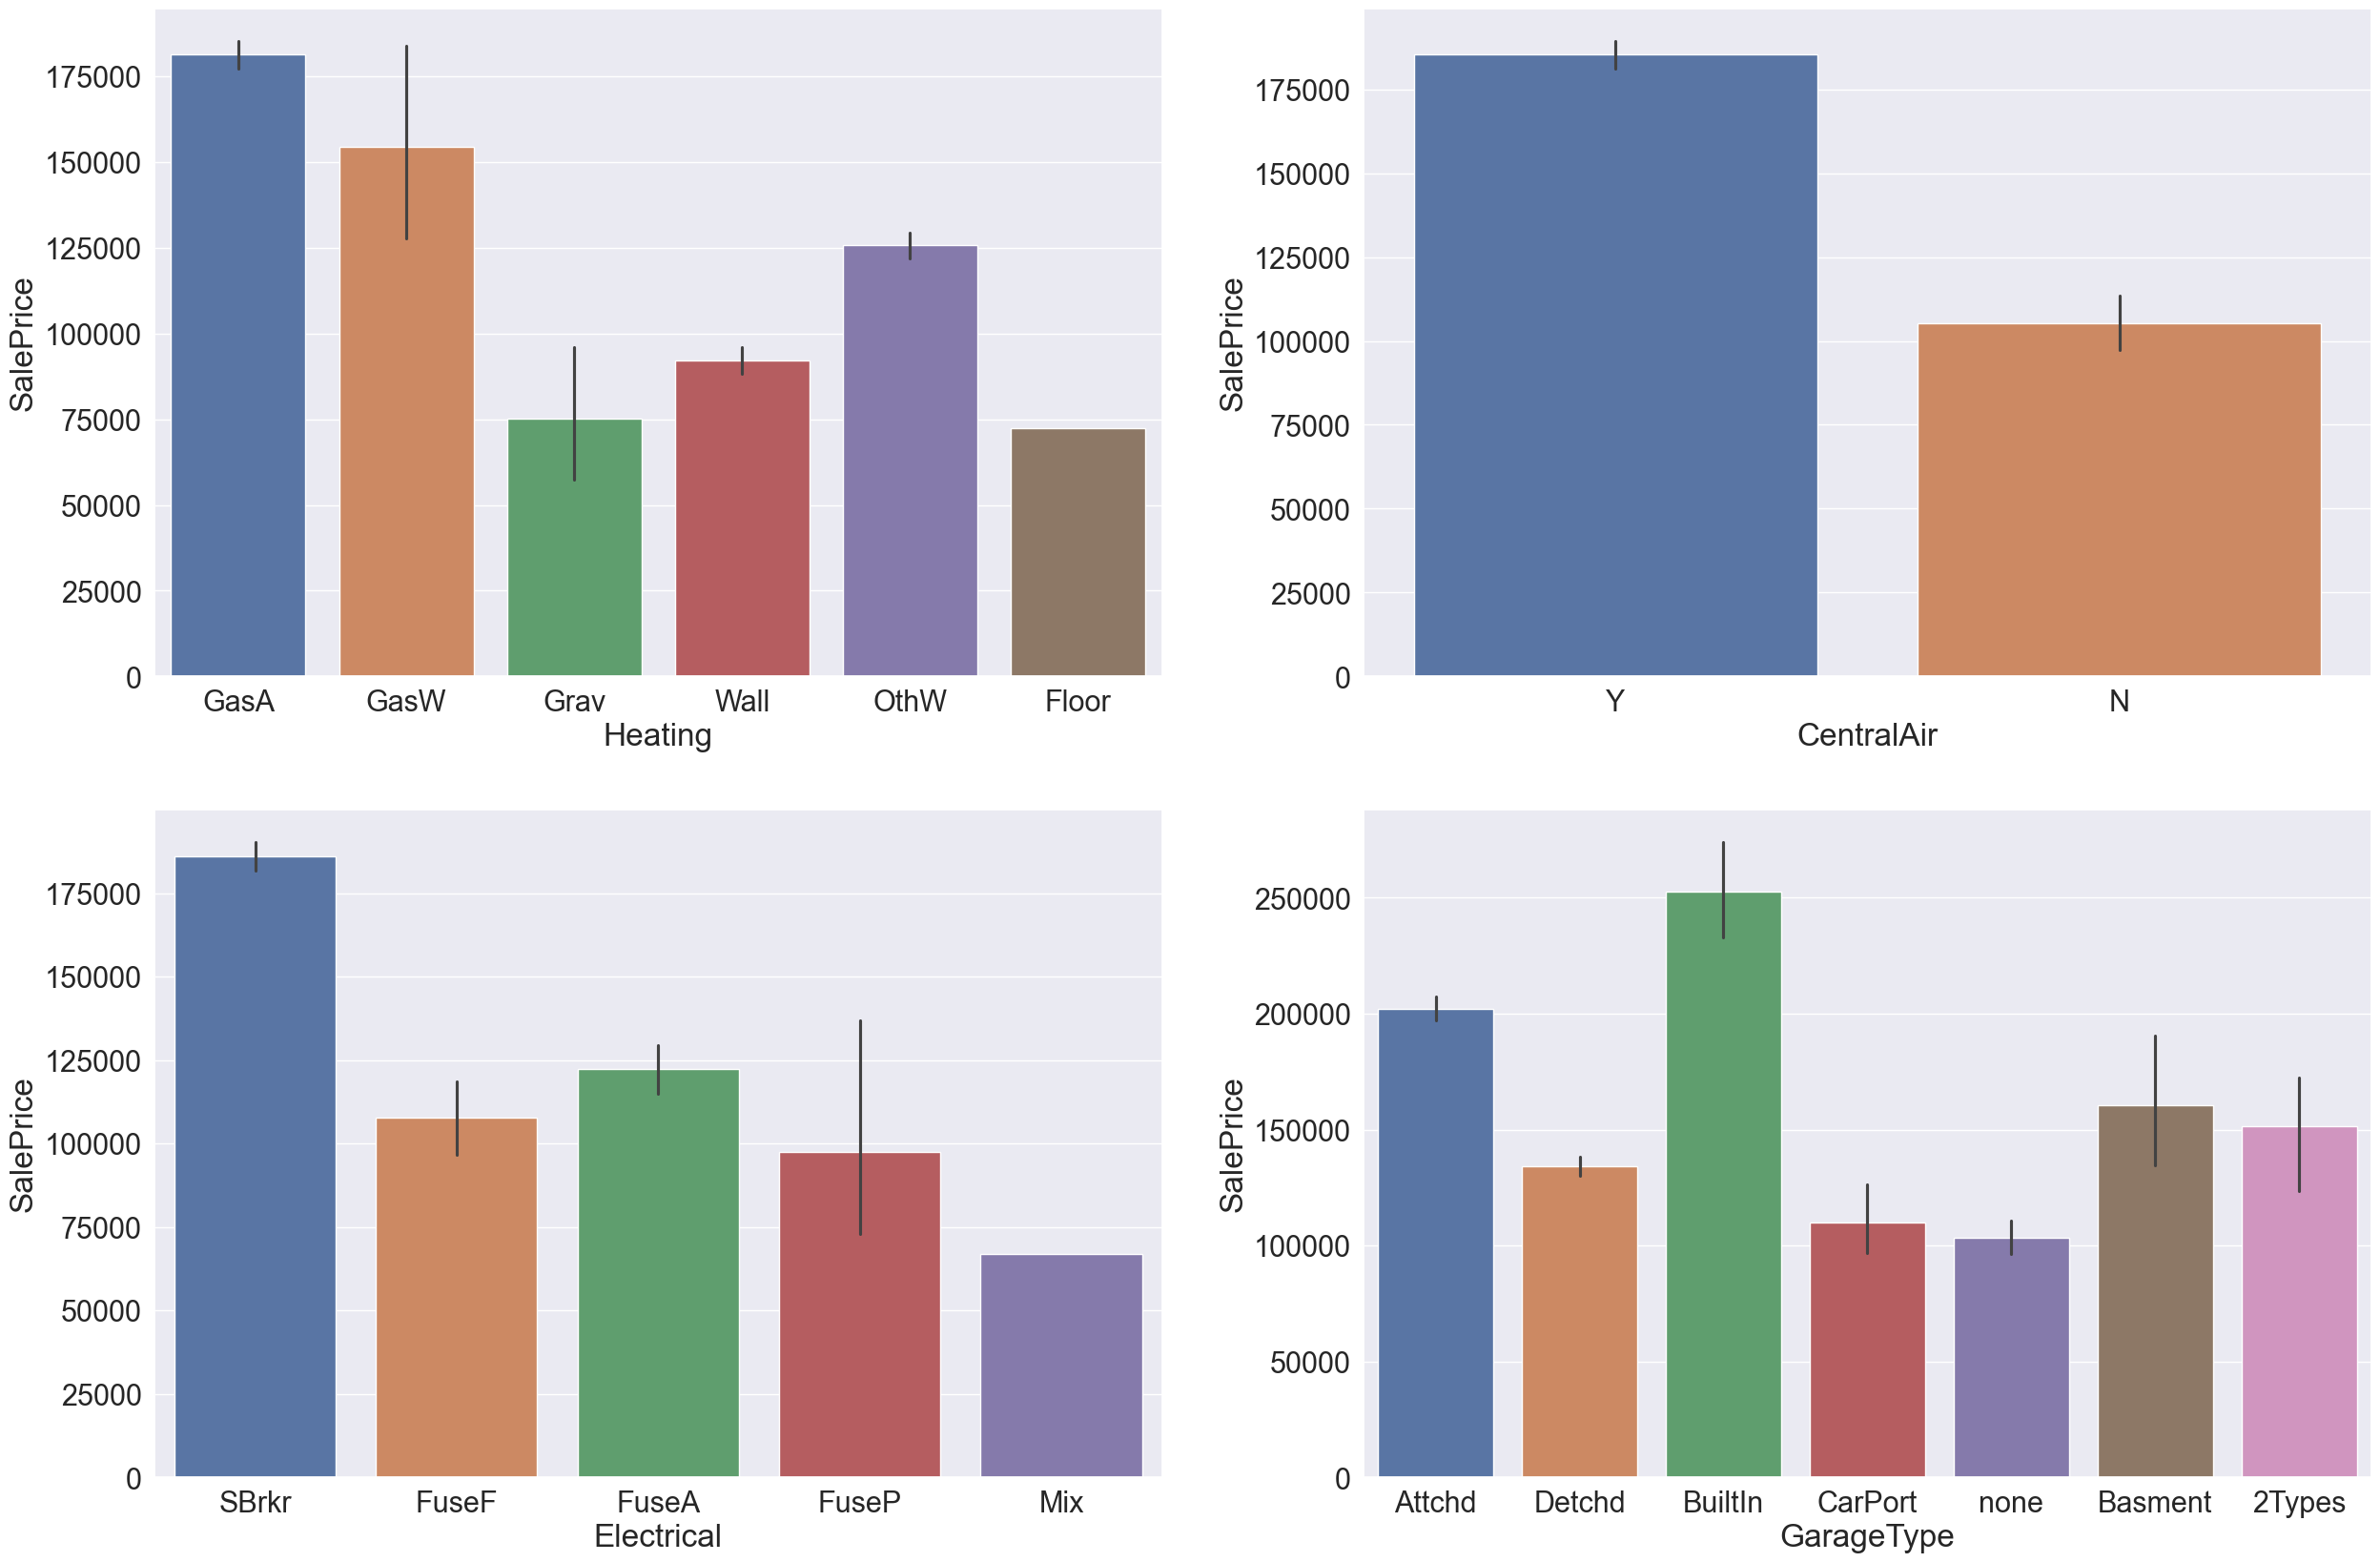

In [32]:
plt.figure(figsize=(30, 20))
plt.subplot(2,2,1)
sns.barplot(x = 'Heating', y = 'SalePrice', data = housingData, palette="deep")
plt.subplot(2,2,2)
sns.barplot(x = 'CentralAir', y = 'SalePrice', data = housingData, palette="deep")
plt.subplot(2,2,3)
sns.barplot(x = 'Electrical', y = 'SalePrice', data = housingData, palette="deep")
plt.subplot(2,2,4)
sns.barplot(x = 'GarageType', y = 'SalePrice', data = housingData, palette="deep")
plt.show()

# Plots below indicate that
    # Presence of 'CentralAir' leads to higher housing price
    # Standard Circuit Breakers 'Electrical' type leads to higher housing price
    # 'GarageType' Built In leads to higher housing price
    # 'Heating' also has effect on housing price with GasA type leading to higer price

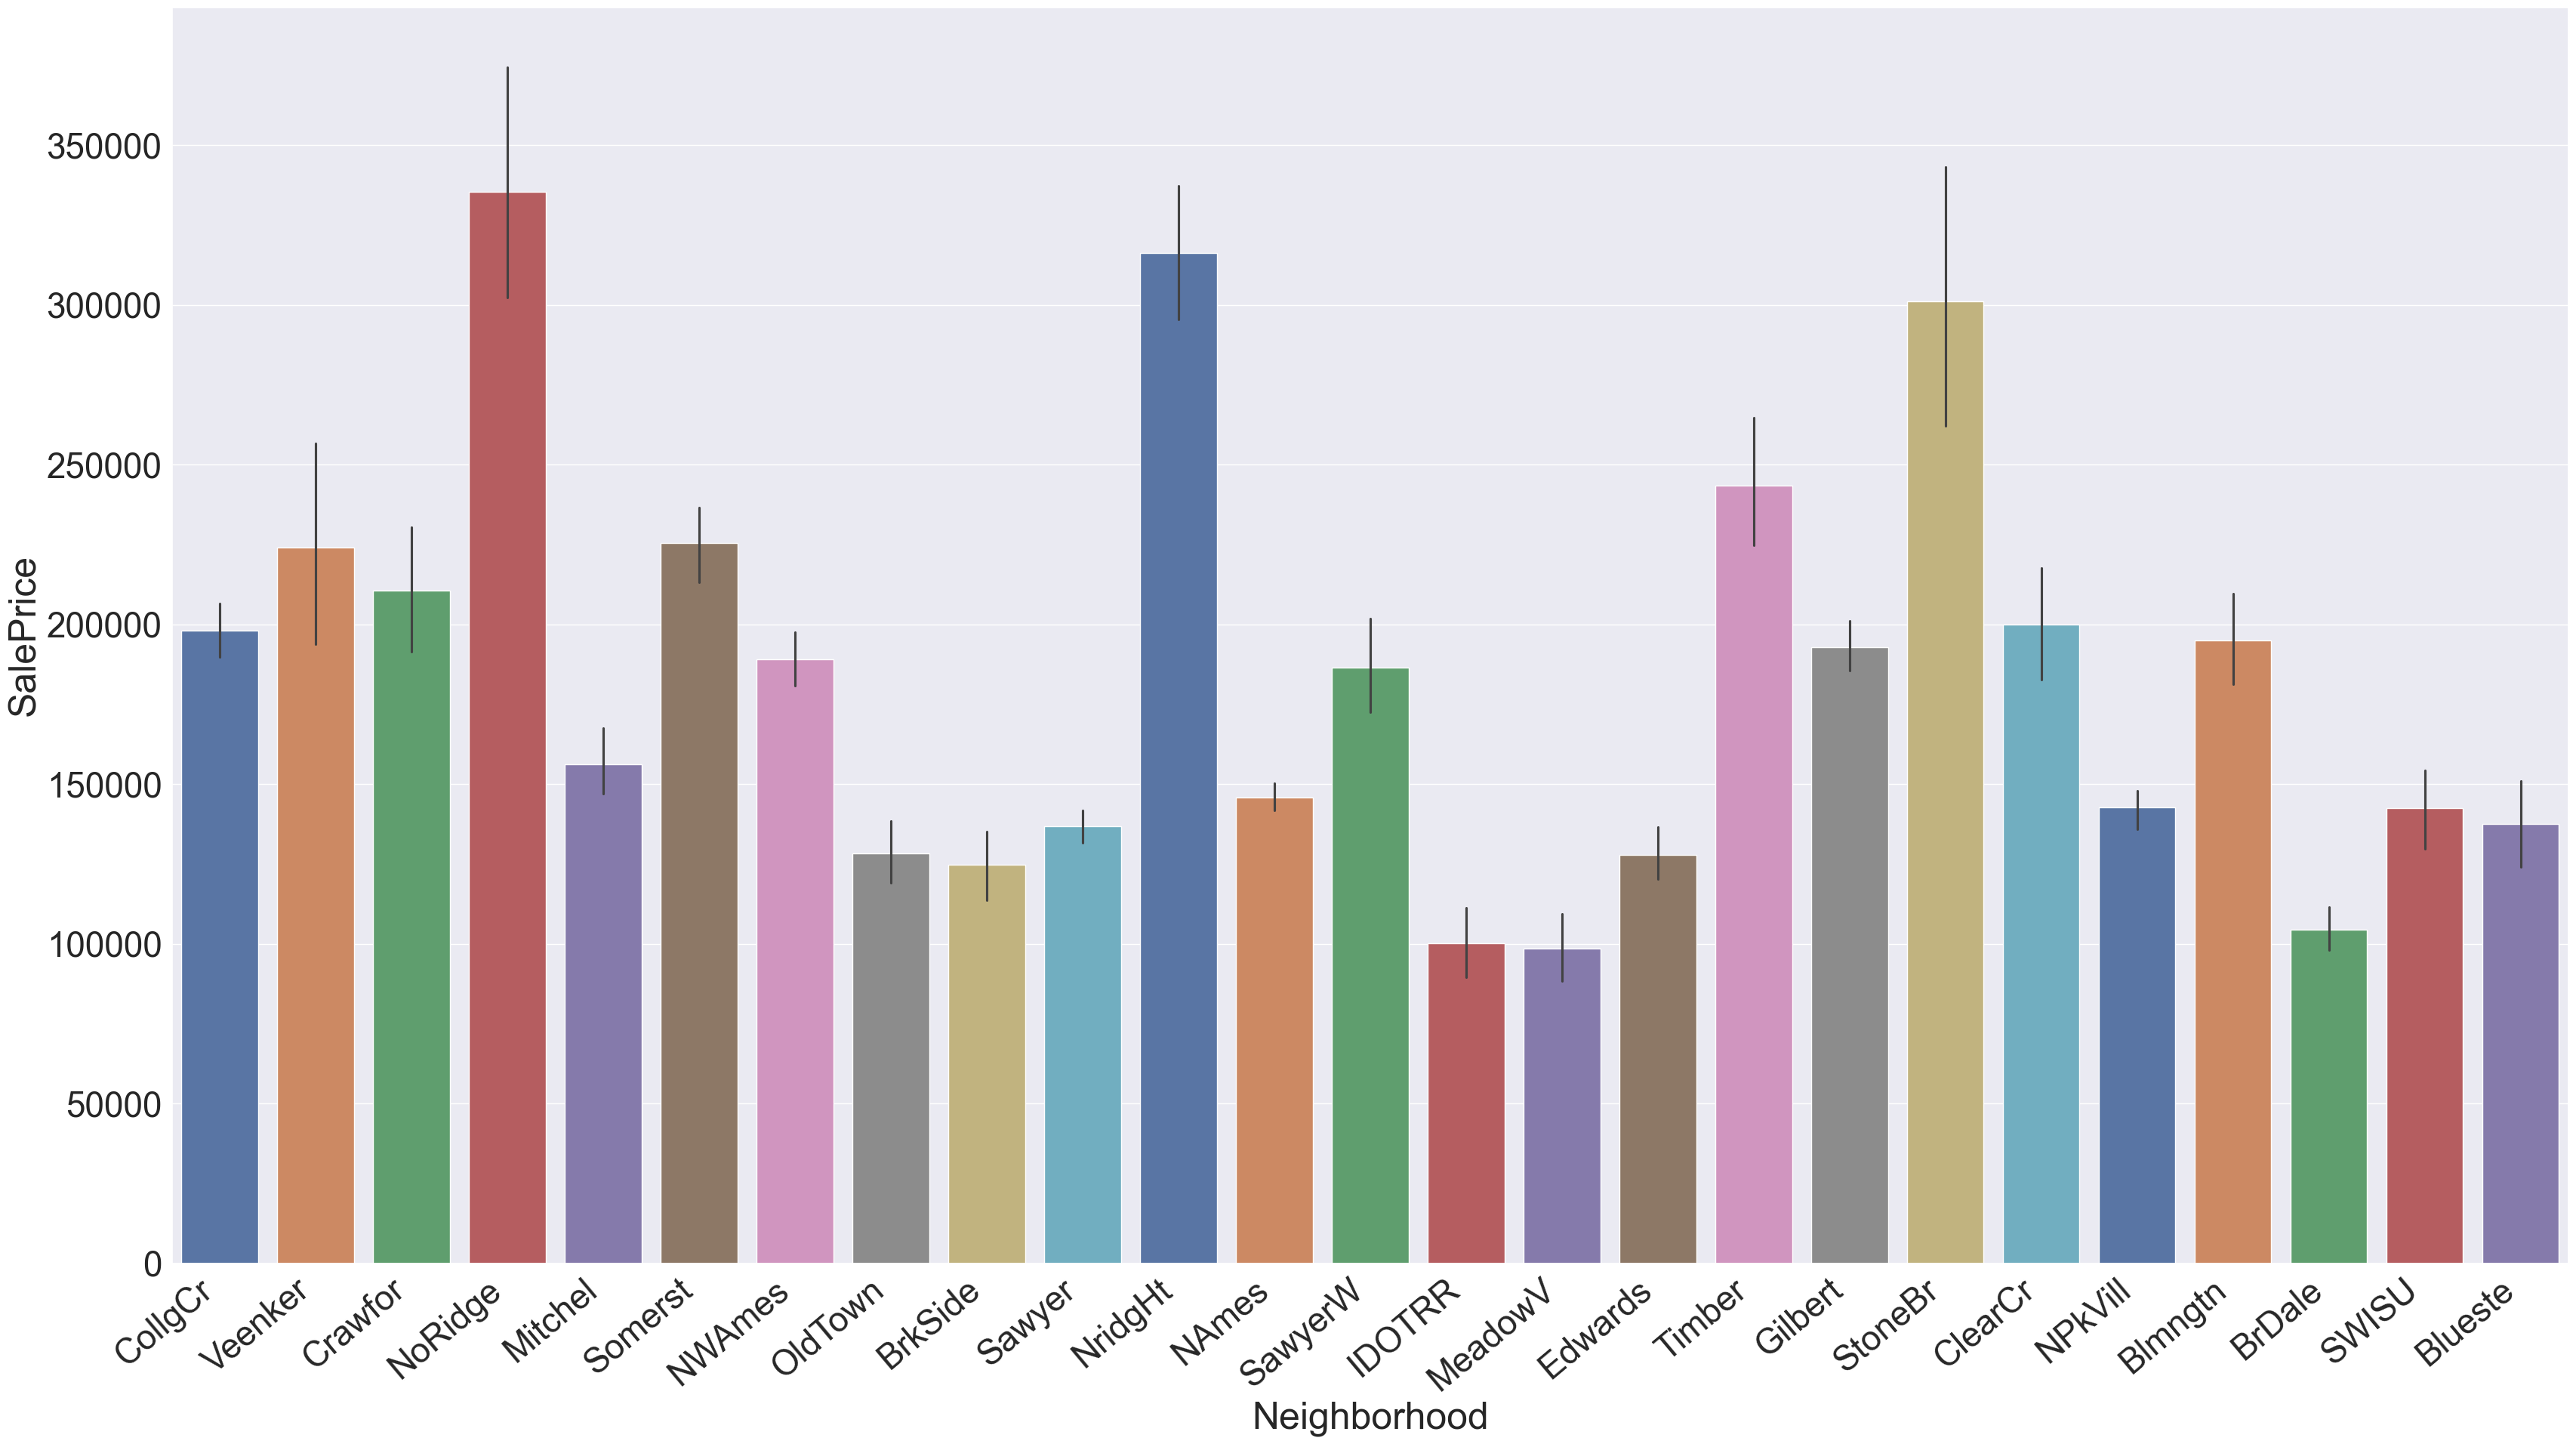

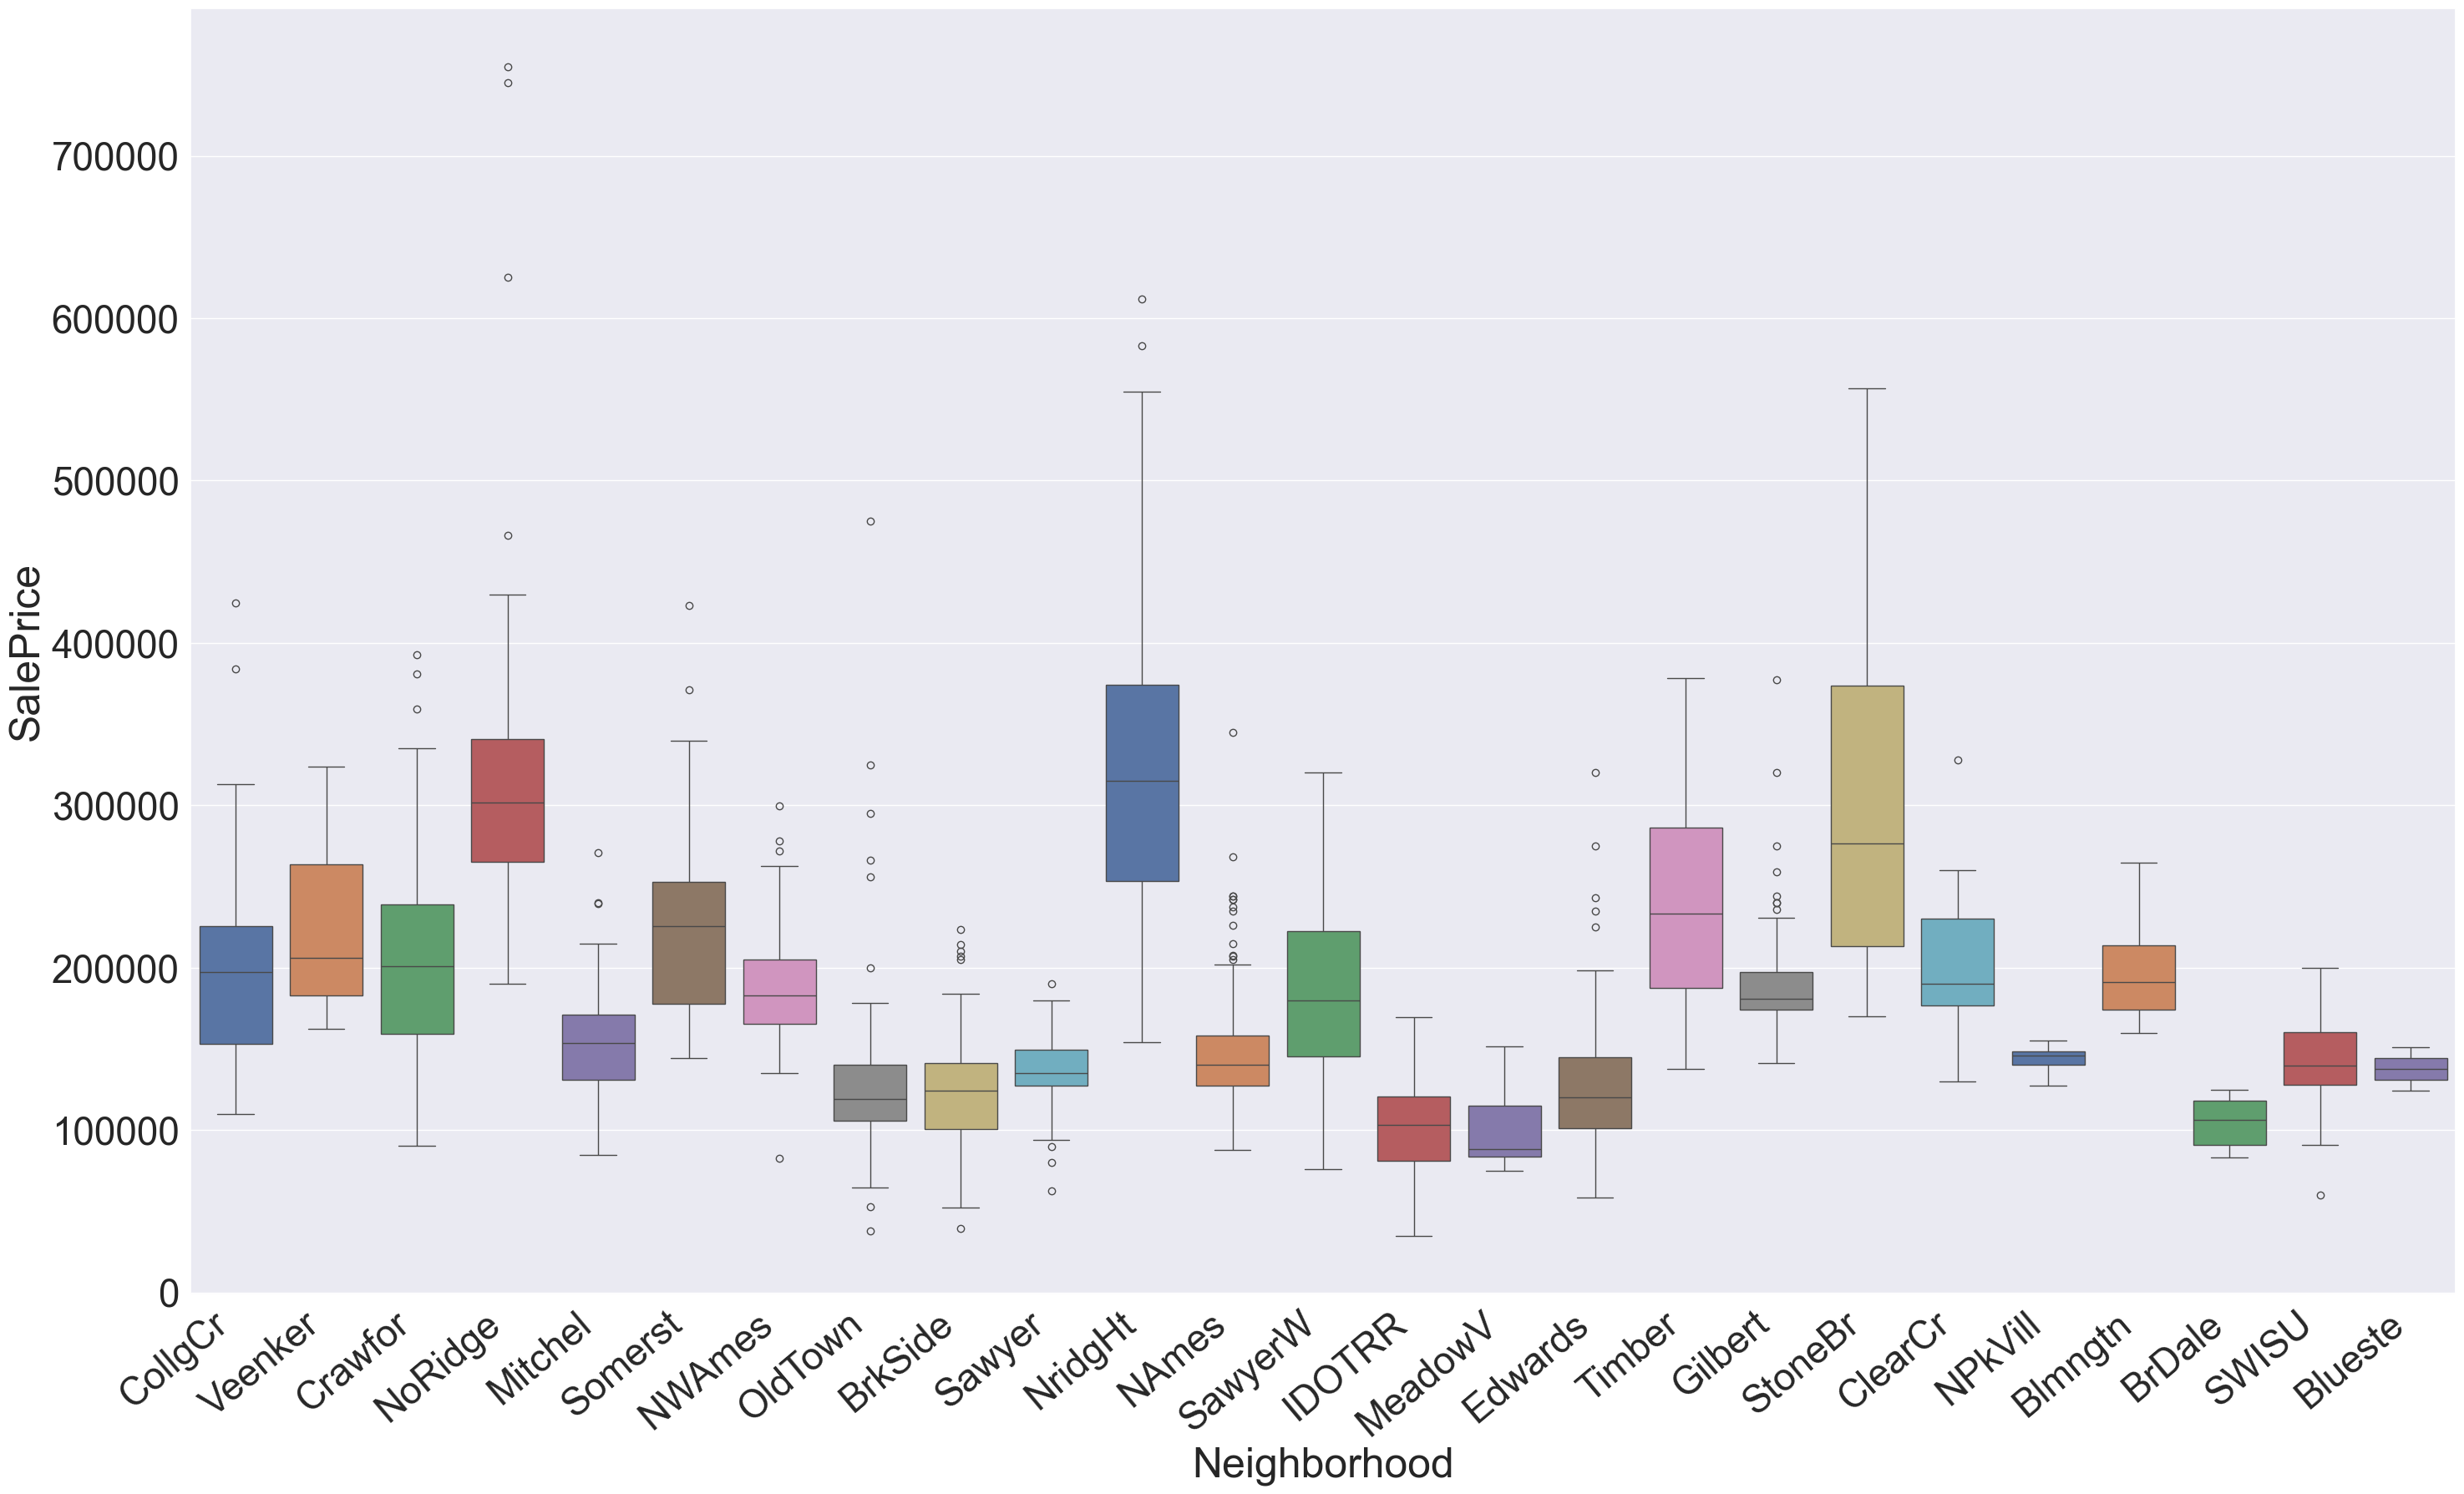

In [33]:
# Checking impact of neighbourhood on sales price
plt.figure(figsize=(35,20))
sns.set(font_scale=3) 
ax = sns.barplot(x="Neighborhood", y="SalePrice", data=housingData, palette=("deep")) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
plt.figure(figsize=(35,20))
sns.set(font_scale=3) 
ax = sns.boxplot(x="Neighborhood", y='SalePrice', data=housingData, palette="deep")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()
    

#### We can see that certain neighborhoods have higher price as compared to other. This is an expected behaviuor

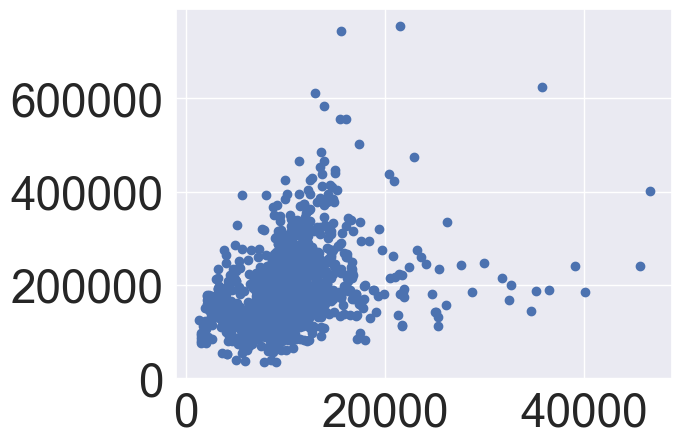

In [34]:

plt.scatter(housingData['LotArea'], housingData['SalePrice'])

<Axes: xlabel='LotArea', ylabel='SalePrice'>

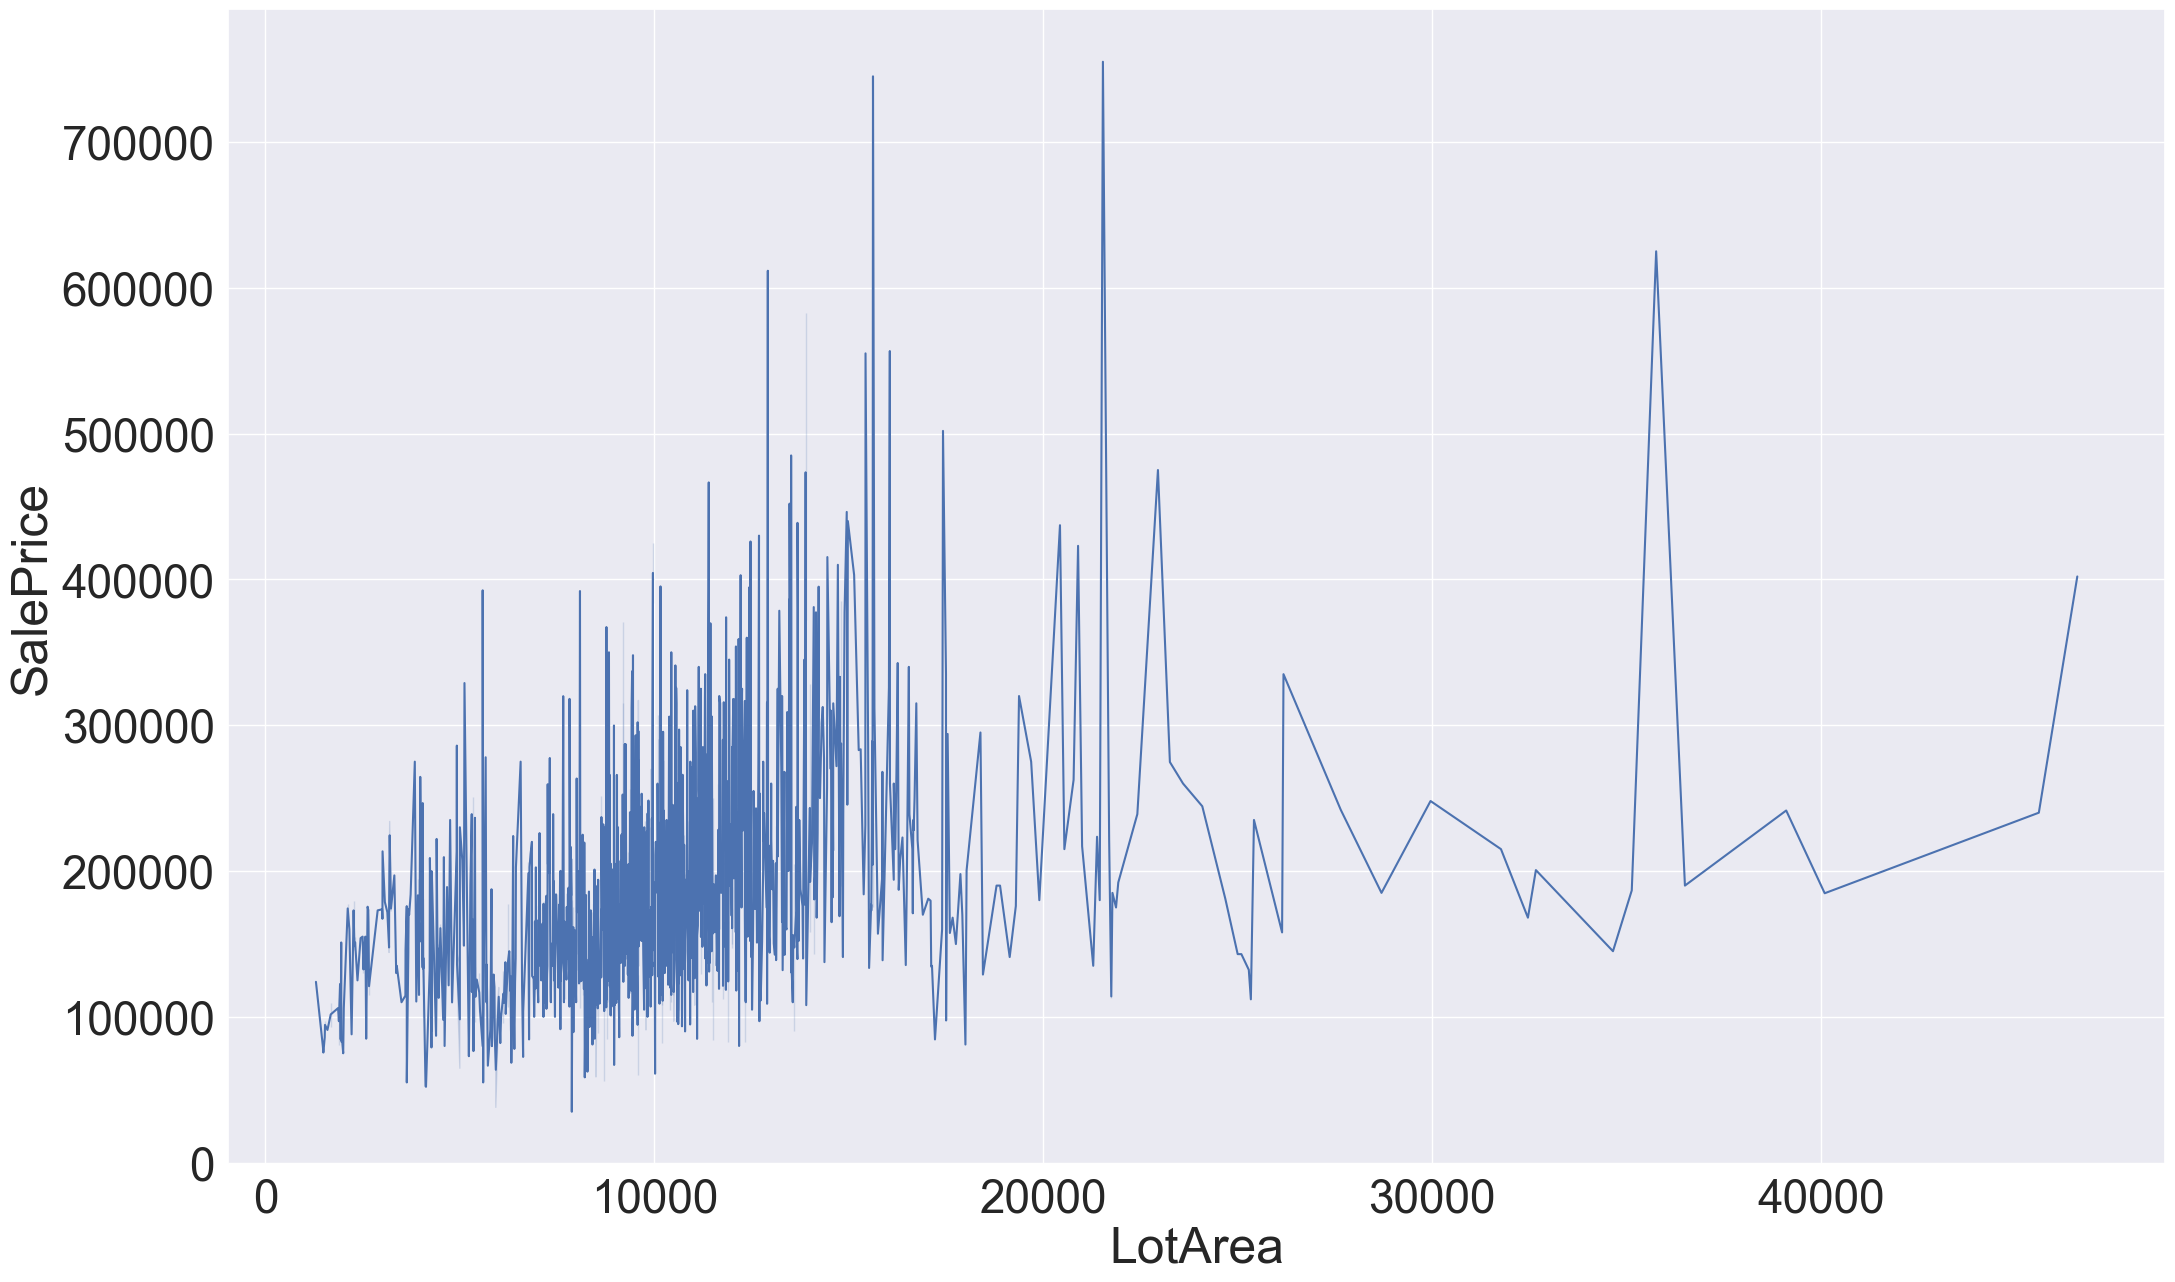

In [35]:
# LotArea impact on pricing
plt.figure(figsize=(25,15))
sns.set(font_scale=3) 
sns.lineplot(x="LotArea", y="SalePrice", data=housingData, palette=("deep"))

#### Prices increse with LotArea but no clear pattern observed

<Axes: xlabel='SalePrice', ylabel='Density'>

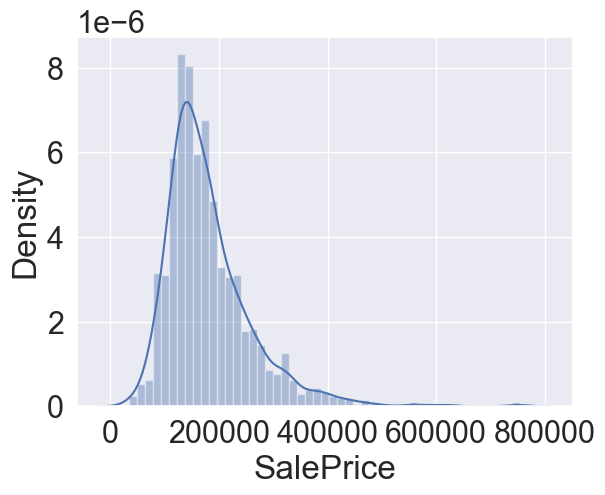

In [36]:
sns.set(font_scale=2) 
sns.distplot(housingData['SalePrice'])

In [37]:
#Log Transformation can be applies to fix the SalePrice curve more crooked towards left
housingData['SalePrice']=np.log1p(housingData['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

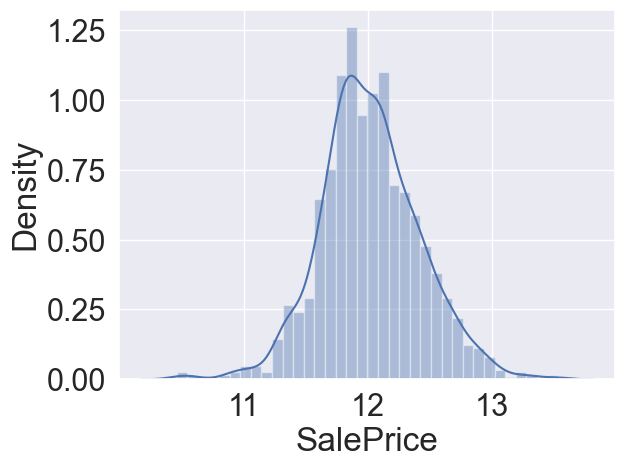

In [38]:
sns.set(font_scale=2) 
sns.distplot(housingData['SalePrice'])

#### Now that we have visualised some of the key data, let us identify any obvious presence of multicollinearity

In [39]:
# Extracting range/numeric variables
rangeData = housingData.select_dtypes(include=['float64', 'int64'])
rangeData.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0  12.247699  
1  12.109016  
2  12.317171  
3  11.849405  
4  12.429220

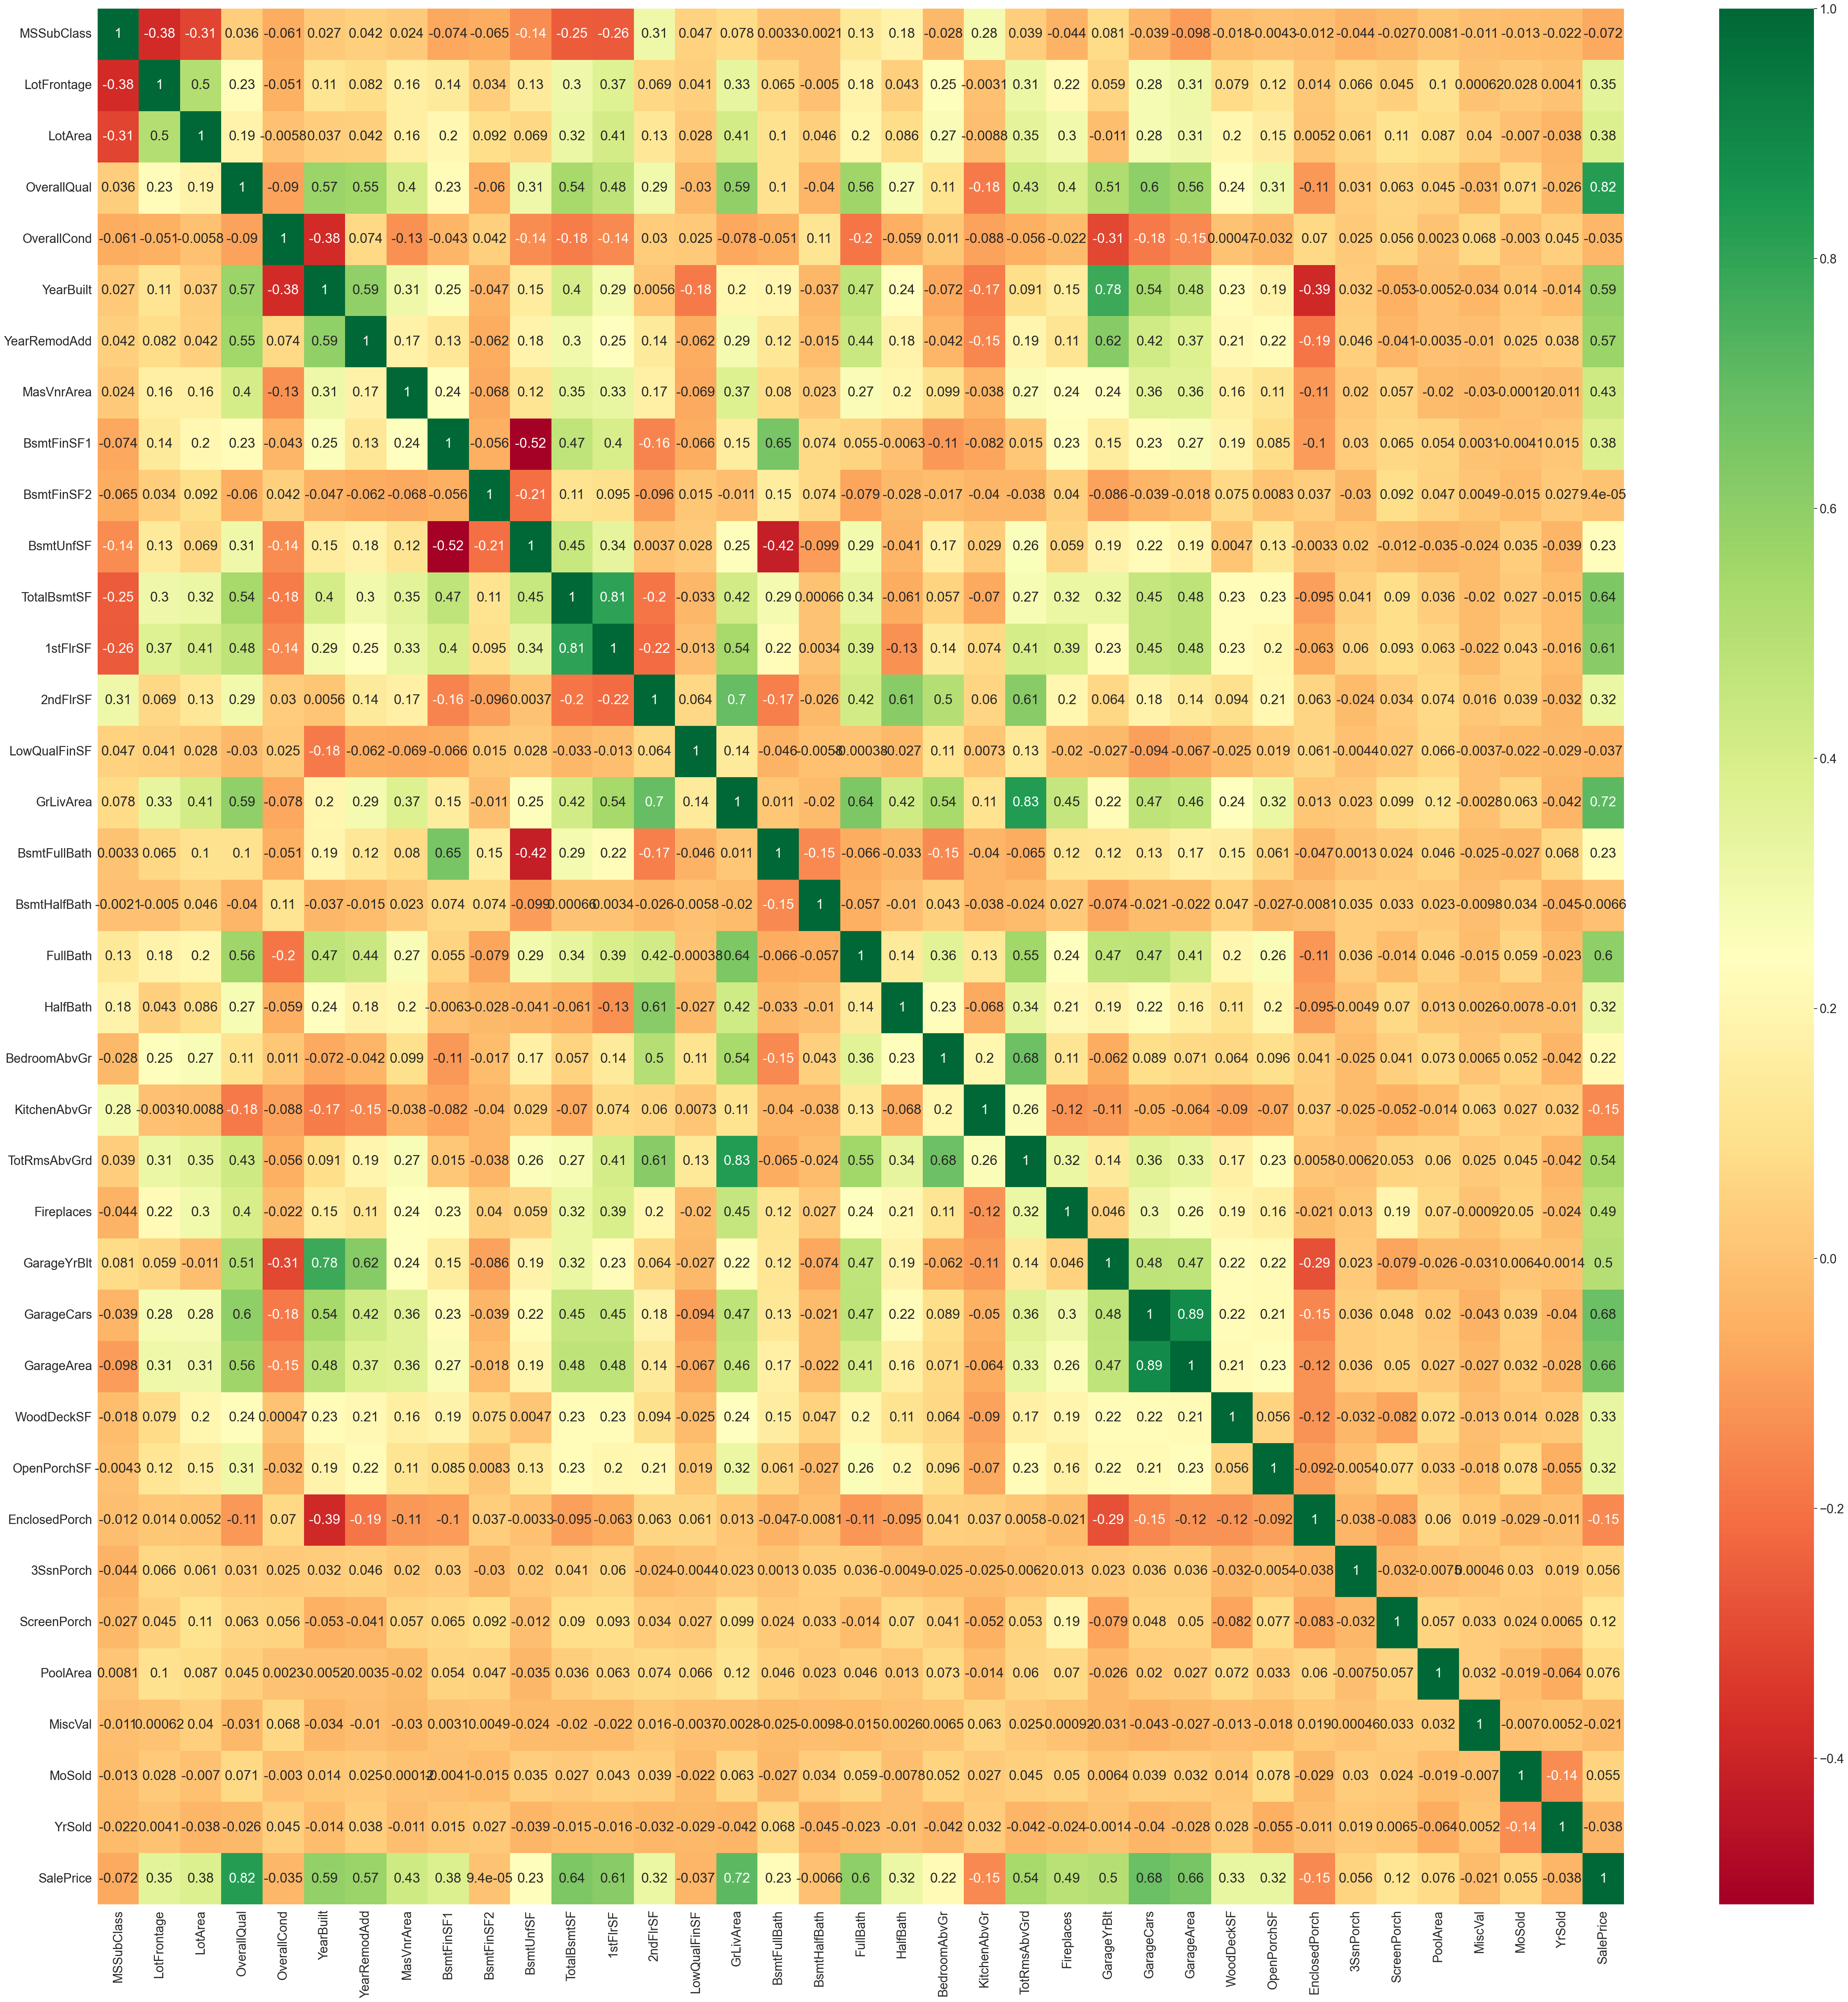

In [40]:
# Checking correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (60, 60))
sns.set(font_scale=2) 
sns.heatmap(rangeData.corr(), annot = True, cmap="RdYlGn")
plt.show()


#### Above plot shows that some variable show close relation with SalePrice
`OverallQual`,`yearBuilt`,`TotalBsmtSF`,`GrLivArea`,`FullBath`,`GarageCars`, `GarageArea`

However, some of the predictor variables also show strong correlation with each other and can be removed
`GarageYrBlt with YearBuilt`, `TotRmsAbvgrd with GrLivArea`, `TotRmsAbvGrd with BedroomAbvGr`, `TotalBsmtSF with BsmtUnfSF`, `GarageCars with GarageArea`, `GarageArea with OverallQual`, `YearRemodAdd with YearBuilt`
Lets further validate the correlation & impact on SalePrice using below plots

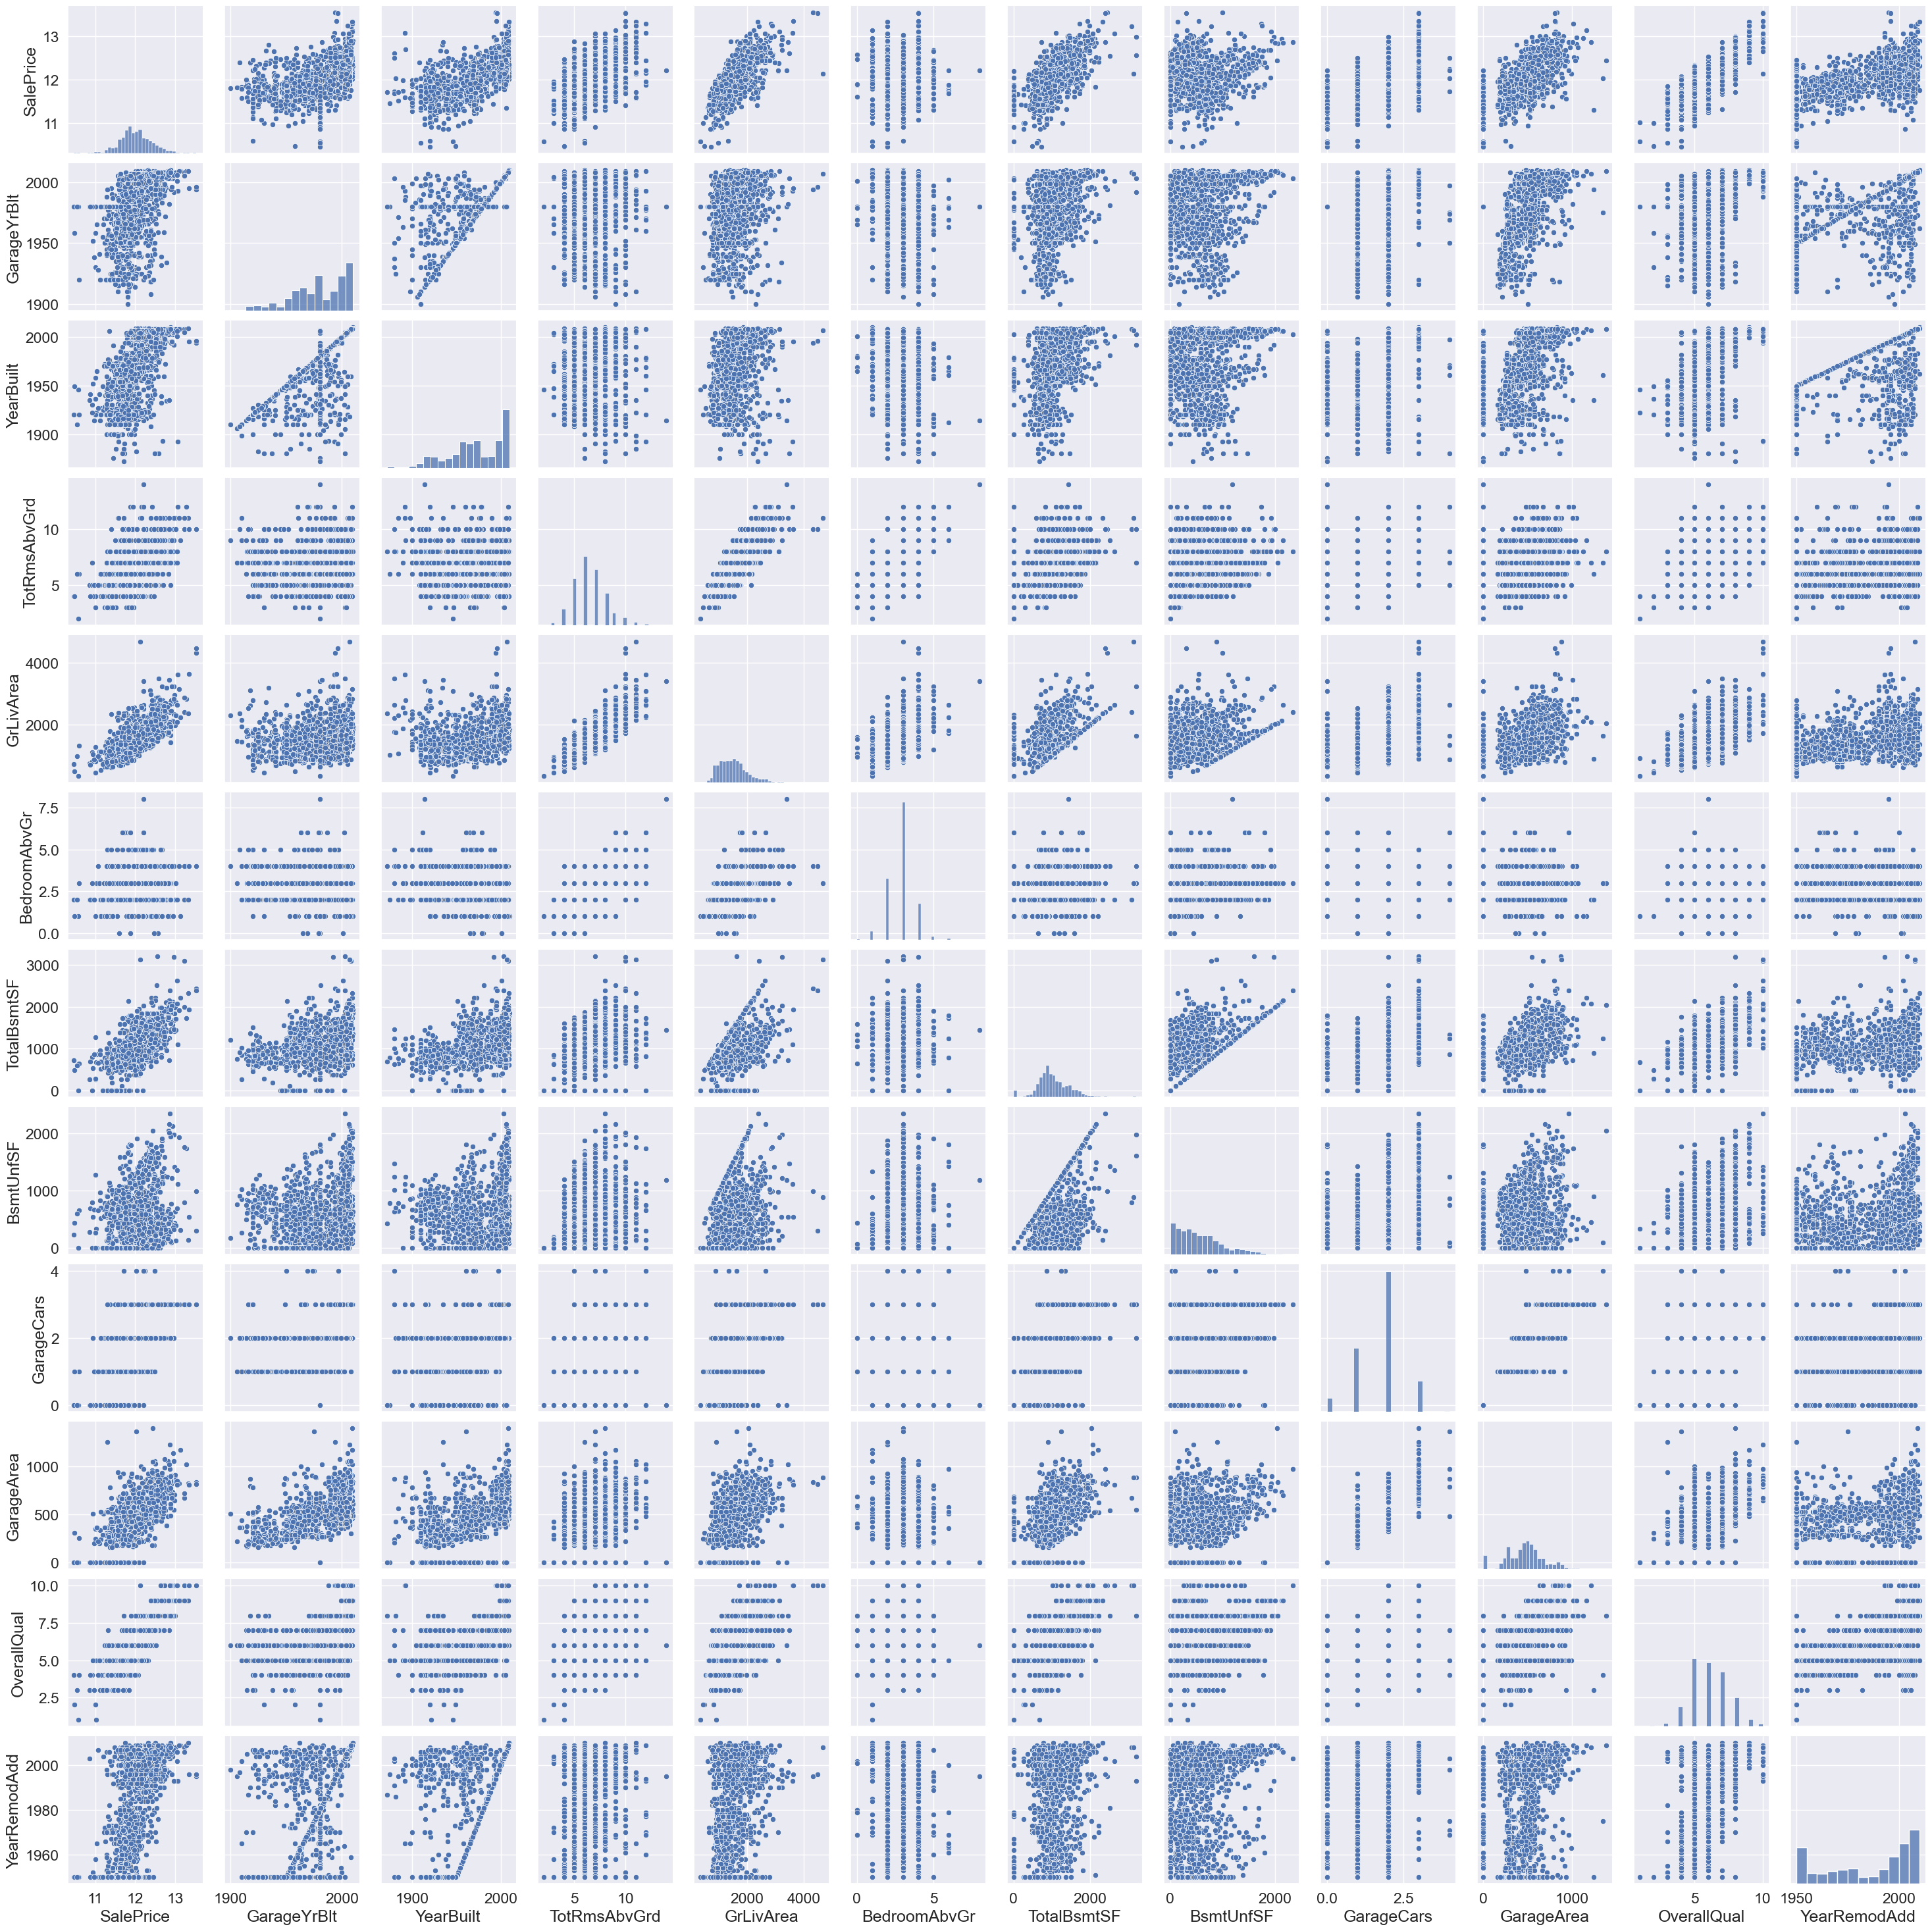

In [41]:
correlatedCols = ["SalePrice", "GarageYrBlt", "YearBuilt", "TotRmsAbvGrd", "GrLivArea", "BedroomAbvGr", "TotalBsmtSF", "BsmtUnfSF", "GarageCars", "GarageArea", "OverallQual", "YearRemodAdd"]
sns.set(font_scale=1.5)
sns.pairplot(housingData[correlatedCols])
plt.show()

#### Above plots confirm the correlation & we can see that correlated columns show almost identical impact on SalePrice
Now we can get rid of some of these to eliminate multicollinearity

In [42]:
dropCols = [ "GarageYrBlt", "TotRmsAbvGrd", "BsmtUnfSF", "GarageCars", "BsmtFinSF1"]
for col in dropCols :
    housingData = housingData.drop(col, axis = 1)

In [43]:
housingData.shape

(1448, 75)

#### Now plotting some numeric columns that show high correlation with SalePrice

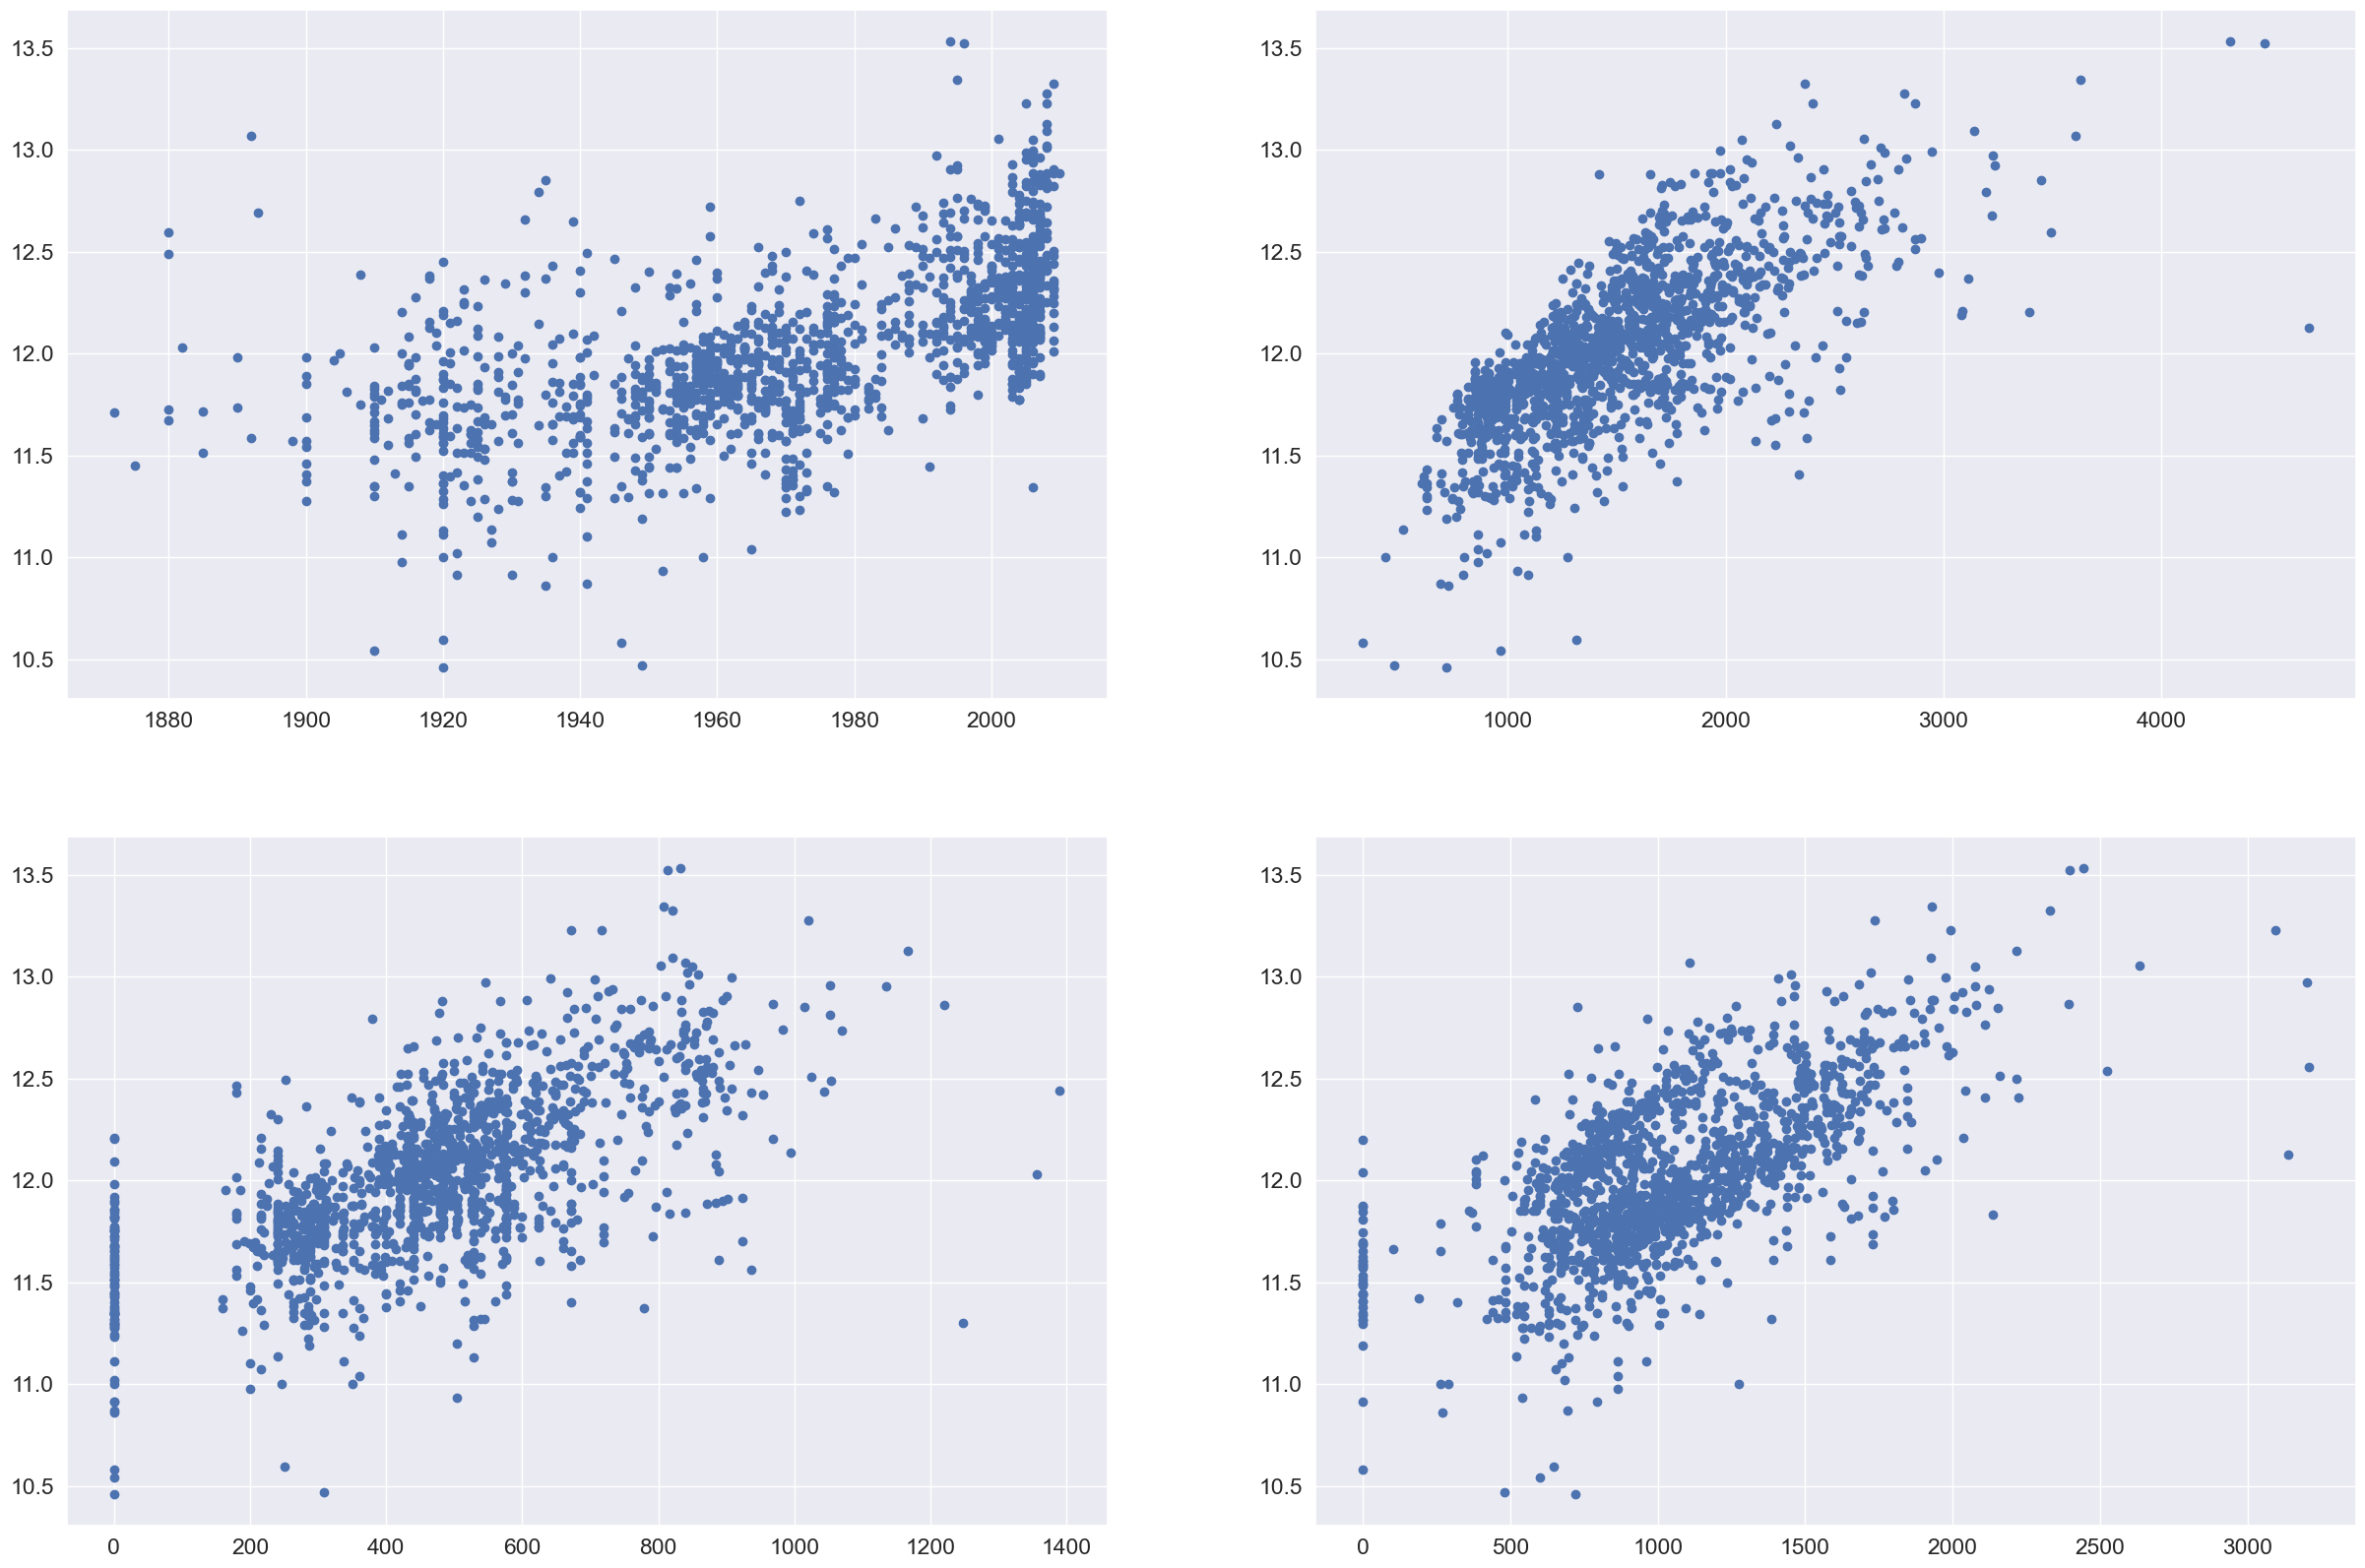

In [44]:
plt.figure(figsize=(30, 20))
plt.subplot(2,2,1)
plt.scatter(housingData['YearBuilt'], housingData['SalePrice'])
plt.subplot(2,2,2)
plt.scatter(housingData['GrLivArea'], housingData['SalePrice'])
plt.subplot(2,2,3)
plt.scatter(housingData['GarageArea'], housingData['SalePrice'])
plt.subplot(2,2,4)
plt.scatter(housingData['TotalBsmtSF'], housingData['SalePrice'])
plt.show()

In [45]:
# GrLivArea & TotalBsmtSF shows outliers towards higher area values. Removing them
housingData = housingData[housingData['GrLivArea'] <= 3000] #Removing outliers
housingData = housingData[housingData['TotalBsmtSF'] <= 2500] #Removing outliers

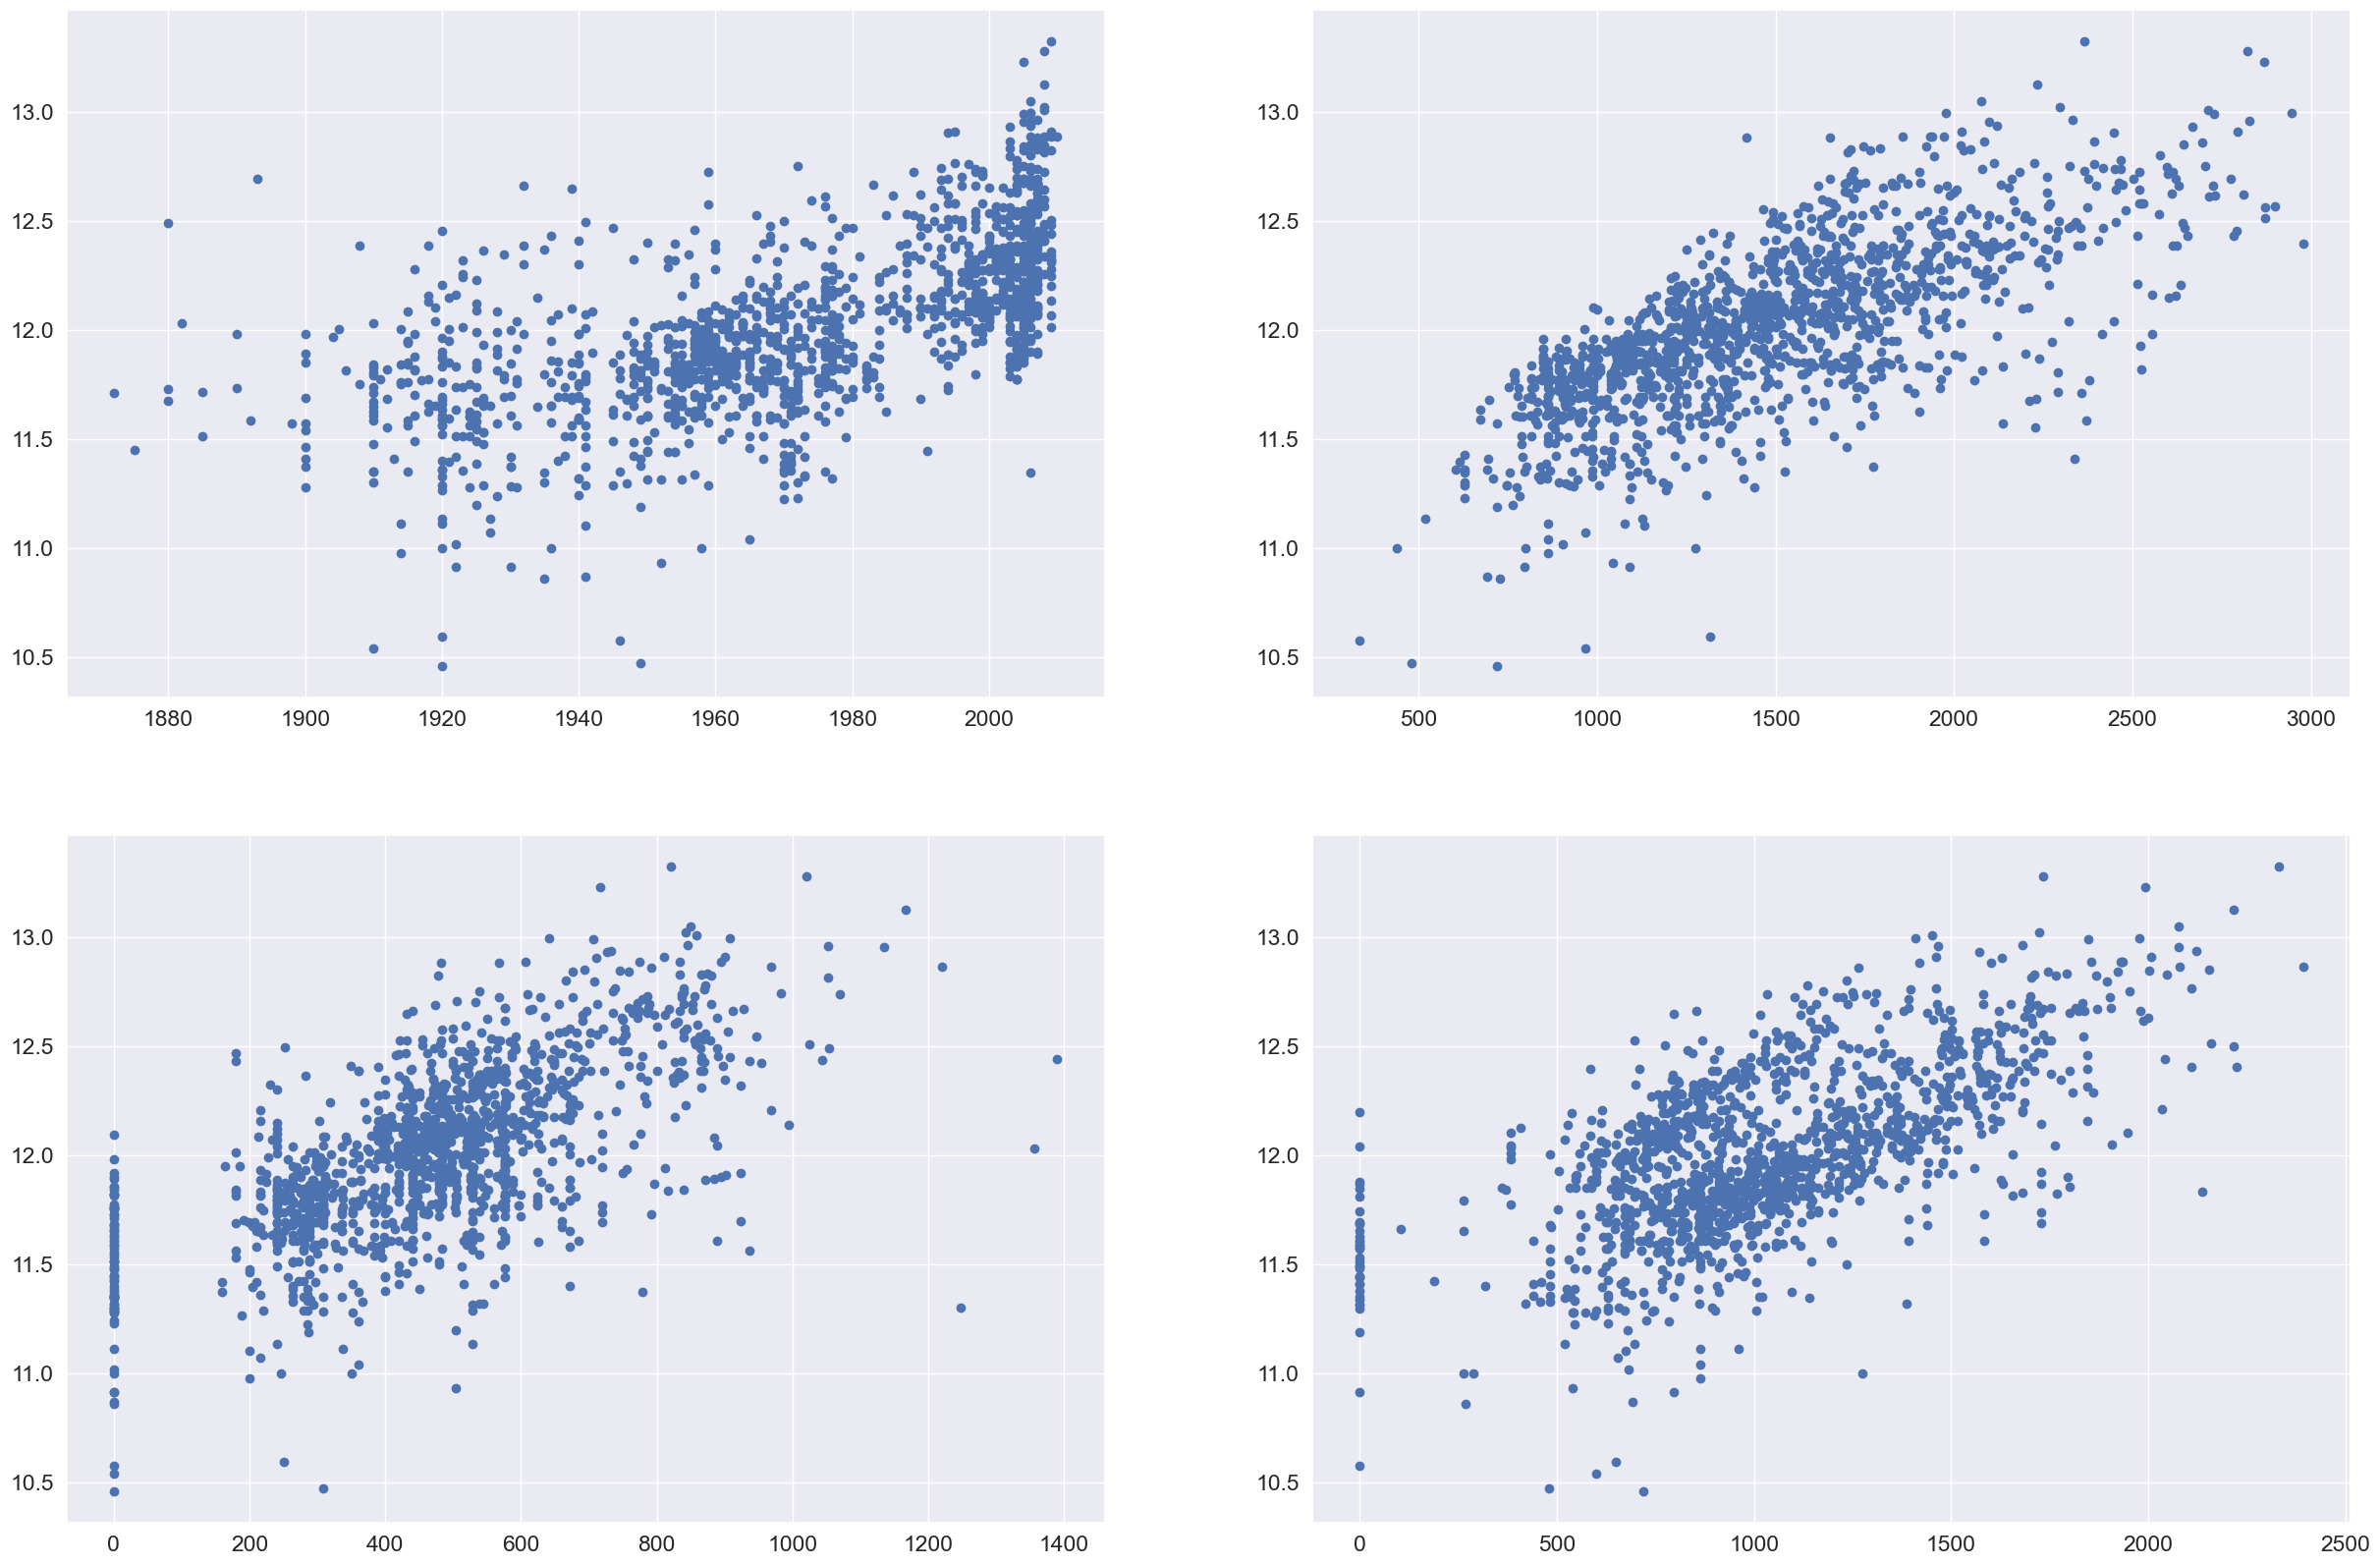

In [46]:
plt.figure(figsize=(30, 20))
plt.subplot(2,2,1)
plt.scatter(housingData['YearBuilt'], housingData['SalePrice'])
plt.subplot(2,2,2)
plt.scatter(housingData['GrLivArea'], housingData['SalePrice'])
plt.subplot(2,2,3)
plt.scatter(housingData['GarageArea'], housingData['SalePrice'])
plt.subplot(2,2,4)
plt.scatter(housingData['TotalBsmtSF'], housingData['SalePrice'])
plt.show()


#### Derived Variable
`YrSold` is an interesting attributed. We can derive ageOfProperty using this as that might also impact SalePrice

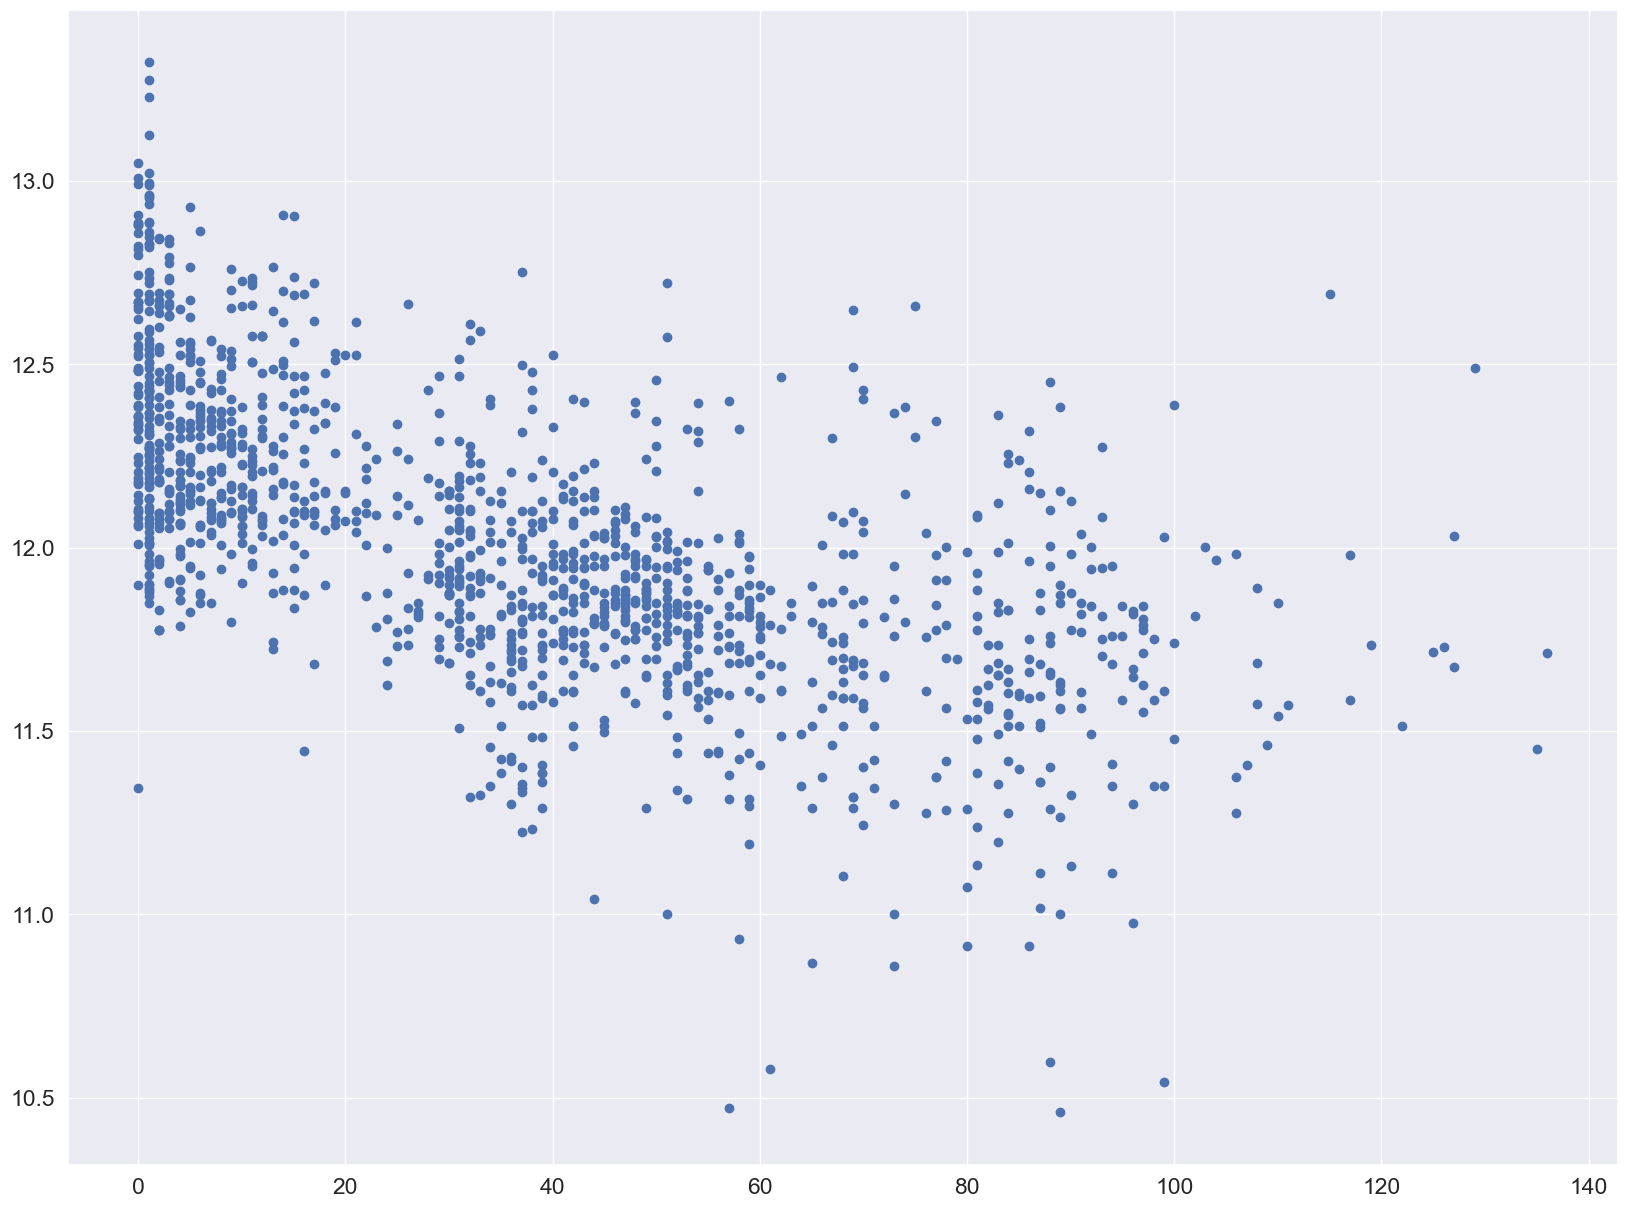

In [47]:
housingData['Age'] = (housingData['YrSold'] - housingData['YearBuilt'])
plt.figure(figsize=(20, 15))
plt.scatter(housingData['Age'], housingData['SalePrice'])

#### The graph indicates that our assumption was correct & older the property - lower the SalePrice
We can now drop the YrSold and other related attributes

In [48]:
housingData = housingData.drop(['YrSold'], axis = 1)
housingData = housingData.drop(['MoSold'], axis = 1)
housingData = housingData.drop(['YearBuilt'], axis = 1)
housingData = housingData.drop(['YearRemodAdd'], axis = 1)

In [49]:
# Also dropping some more variables whose majority of the data has same value indicating not much variance
housingData = housingData.drop(['Street','Utilities','PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)

In [50]:
housingData.shape

(1428, 61)

### Data seems clean now and we can proceed with preparing it further for model building

#### Data Prepartion - converting categorical columns into dummy variables

In [51]:
# Identifying all category & numeric columns
catCols = (housingData.select_dtypes(include=['object'])).columns
numCols = (housingData.select_dtypes(include=['float64', 'int64'])).columns
catCols

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [52]:
numCols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'SalePrice', 'Age'],
      dtype='object')

In [53]:
# Adding Dummy variables for each category column
for col in catCols :
    dummies=pd.get_dummies(housingData[col], dtype='int', prefix=col, drop_first=True)
    housingData = pd.concat([housingData,dummies],axis=1)

# Dropping the original cateory column afterwards
housingData.drop(catCols, axis = 1, inplace = True)

In [54]:
housingData.shape

(1428, 210)

In [55]:
for col in housingData.columns :
    print(col)

MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
MasVnrArea
BsmtFinSF2
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
Fireplaces
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
SalePrice
Age
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighborhood_Mitchel
Neighborhood_NAmes
Neighborhood_NPkVill
Neighborhood_NWAmes
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_OldTown
Neighborhood_SWISU
Neighborhood_Sawyer
Neighborhood_SawyerW
Neighborhood_Somerst
Neighborhood_StoneBr
Neighborhood_Tim

In [56]:
housingData.drop('MiscFeature_TenC', axis = 1, inplace = True)

In [57]:
housingData.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0           0          856       856       854             0       1710   
1           0         1262      1262         0             0       1262   
2           0          920       920       866             0       1786   
3           0          756       961       756             0       1717   
4           0         1145      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           0         548           0           61              0          0   
1           1         460         298            0              0          0   
2           1         608           0           42              0          0   
3           1         642           0           35            272          0   
4           1         836         192           84              0          0   

   ScreenPorch  PoolArea  SalePrice  Age  MSZoning_FV  MSZoning_RH  \
0            0         0  12.247699    5            0            0   
1            0         0  12.109016   31            0            0   
2            0         0  12.317171    7            0            0   
3            0         0  11.849405   91            0            0   
4            0         0  12.429220    8            0            0   

   MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0            1            0             0             0             1   
1            1            0             0             0             1   
2            1            0             0             0             0   
3            1            0             0             0             0   
4            1            0             0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
0                0                0                1                  0   
1                0                0                1                  0   
2                0                0                1                  0   
3                0                0                1                  0   
4                0                0                1                  0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
0              0              0                 1              0   
1              1              0                 0              0   
2              0              0                 1              0   
3              0              0                 0              0   
4              1              0                 0              0   

   LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0                     0                    0   
1              0                     0                    0   
2              0                     0                    0   
3              0                     0                    0   
4              0                     0                    0   

   Neighborhood_BrkSid

## Step 4 : Splitting the data into train-test sets & Preparing the train data set

1. We will do a 70-30 split for converting given data into train & test data set
2. Then we will scale the data using min-max scaler to rescale the predictor variables' values. This is to ensure all values fit between fixed range 0-1 and their coefficients are comparable

In [58]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housingData, train_size = 0.7, test_size = 0.3, random_state = 100)

In [59]:
df_train.shape

(999, 209)

In [60]:
df_test.shape

(429, 209)

In [61]:
# Visualising all numeric columns data range to verify they all need scaling
df_train[numCols].describe()

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  999.000000   999.000000    999.000000   999.000000   999.000000   
mean    56.921922    69.596597   9709.843844     6.010010     5.569570   
std     42.281620    21.069891   4092.289437     1.365881     1.132024   
min     20.000000    21.000000   1300.000000     1.000000     1.000000   
25%     20.000000    60.000000   7582.500000     5.000000     5.000000   
50%     50.000000    69.000000   9353.000000     6.000000     5.000000   
75%     70.000000    79.000000  11416.000000     7.000000     6.000000   
max    190.000000   313.000000  39104.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF2  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count   999.000000   999.000000   999.000000   999.000000   999.000000   
mean     97.734735    46.922923  1030.706707  1138.248248   326.839840   
std     167.442153   160.423891   385.078805   348.530615   414.844269   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000     0.000000   793.500000   884.000000     0.000000   
50%       0.000000     0.000000   978.000000  1077.000000     0.000000   
75%     163.500000     0.000000  1254.500000  1341.000000   703.000000   
max    1600.000000  1120.000000  2392.000000  2898.000000  1426.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath  \
count    999.000000   999.000000    999.000000    999.000000  999.000000   
mean       4.732733  1469.820821      0.432432      0.061061    1.525526   
std       43.372988   459.259815      0.513533      0.247786    0.538218   
min        0.000000   334.000000      0.000000      0.000000    0.000000   
25%        0.000000  1118.000000      0.000000      0.000000    1.000000   
50%        0.000000  1428.000000      0.000000      0.000000    2.000000   
75%        0.000000  1738.500000      1.000000      0.000000    2.000000   
max      528.000000  2978.000000      2.000000      2.000000    3.000000   

         HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces   GarageArea  \
count  999.000000    999.000000    999.000000  999.000000   999.000000   
mean     0.374374      2.853854      1.055055    0.583584   463.152152   
std      0.504473      0.806203      0.236821    0.628937   211.869404   
min      0.000000      0.000000      0.000000    0.000000     0.000000   
25%      0.000000      2.000000      1.000000    0.000000   310.500000   
50%      0.000000      3.000000      1.000000    1.000000   472.000000   
75%      1.000000      3.000000      1.000000    1.000000   576.000000   
max      2.000000      6.000000      3.000000    3.000000  1390.000000   

       WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  ScreenPorch  \
count  999.000000   999.000000     999.000000  999.000000   999.000000   
mean    90.561562    44.759760      23.530531    2.891892    13.297297   
std    118.256540    66.017748      61.869658   25.389122    51.388464   
min      0.000000     0.000000       0.000000    0.000000     0.000000   
25%      0.000000     0.000000       0.000000    0.000000     0.000000   
50%      0.000000    20.000000       0.000000    0.000000     0.000000   
75%    168.000000    64.500000       0.000000    0.000000     0.000000   
max    635.000000   547.000000     330.000000  320.000000   480.000000   

         PoolArea   SalePrice         Age  
count  999.000000  999.000000  999.000000  
mean     0.576577   11.992106   37.502503  
std     18.223834    0.383560   29.580056  
min      0.000000   10.460271    0.000000  
25%      0.000000   11.767575    9.000000  
50%      0.000000   11.964007   36.000000  
75%      0.000000   12.220720   55.000000  
max    576.000000   13.275829  136.000000

In [62]:
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
df_train[numCols] = scaler.fit_transform(df_train[numCols])

In [63]:
# Verifying output of data scaling. All min should be 0 & max should be 1 
df_train[numCols].describe()

MSSubClass  LotFrontage     LotArea  OverallQual  OverallCond  \
count  999.000000   999.000000  999.000000   999.000000   999.000000   
mean     0.217188     0.166427    0.222459     0.556668     0.571196   
std      0.248715     0.072157    0.108250     0.151765     0.141503   
min      0.000000     0.000000    0.000000     0.000000     0.000000   
25%      0.000000     0.133562    0.166186     0.444444     0.500000   
50%      0.176471     0.164384    0.213020     0.555556     0.500000   
75%      0.294118     0.198630    0.267591     0.666667     0.625000   
max      1.000000     1.000000    1.000000     1.000000     1.000000   

       MasVnrArea  BsmtFinSF2  TotalBsmtSF    1stFlrSF    2ndFlrSF  \
count  999.000000  999.000000   999.000000  999.000000  999.000000   
mean     0.061084    0.041895     0.430897    0.313669    0.229200   
std      0.104651    0.143236     0.160986    0.135932    0.290915   
min      0.000000    0.000000     0.000000    0.000000    0.000000   
25%      0.000000    0.000000     0.331731    0.214509    0.000000   
50%      0.000000    0.000000     0.408863    0.289782    0.000000   
75%      0.102188    0.000000     0.524457    0.392746    0.492987   
max      1.000000    1.000000     1.000000    1.000000    1.000000   

       LowQualFinSF   GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath  \
count    999.000000  999.000000    999.000000    999.000000  999.000000   
mean       0.008964    0.429584      0.216216      0.030531    0.508509   
std        0.082146    0.173699      0.256767      0.123893    0.179406   
min        0.000000    0.000000      0.000000      0.000000    0.000000   
25%        0.000000    0.296520      0.000000      0.000000    0.333333   
50%        0.000000    0.413767      0.000000      0.000000    0.666667   
75%        0.000000    0.531203      0.500000      0.000000    0.666667   
max        1.000000    1.000000      1.000000      1.000000    1.000000   

         HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  \
count  999.000000    999.000000    999.000000  999.000000  999.000000   
mean     0.187187      0.475642      0.351685    0.194528    0.333203   
std      0.252236      0.134367      0.078940    0.209646    0.152424   
min      0.000000      0.000000      0.000000    0.000000    0.000000   
25%      0.000000      0.333333      0.333333    0.000000    0.223381   
50%      0.000000      0.500000      0.333333    0.333333    0.339568   
75%      0.500000      0.500000      0.333333    0.333333    0.414388   
max      1.000000      1.000000      1.000000    1.000000    1.000000   

       WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  ScreenPorch  \
count  999.000000   999.000000     999.000000  999.000000   999.000000   
mean     0.142617     0.081828       0.071305    0.009037     0.027703   
std      0.186231     0.120691       0.187484    0.079341     0.107059   
min      0.000000     0.000000       0.000000    0.000000     0.000000   
25%      0.000000     0.000000       0.000000    0.000000     0.000000   
50%      0.000000     0.036563       0.000000    0.000000     0.000000   
75%      0.264567     0.117916       0.000000    0.000000     0.000000   
max      1.000000     1.000000       1.000000    1.000000     1.000000   

         PoolArea   SalePrice         Age  
count  999.000000  999.000000  999.000000  
mean     0.001001    0.544061    0.275754  
std      0.031639    0.136229    0.217500  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.464315    0.066176  
50%      0.000000    0.534081    0.264706  
75%      0.000000    0.625257    0.404412  
max      1.000000    1.000000    1.000000

## Step 5 : Building a multi linear model

From the above plots, the predictor variables show an almost linear realtion with outcome variable.

We will build a linear model on train data set & later validate it on test data set.
To begin with, we need to identify key predcitors that should be a part of the model. We will use automated approach - `RFE` for that. 
We will start conservatively by picking about 100 variables and then further refine our model by eliminating more predictors based on p-value, f-statistics & VIF

In [64]:
# Splitting predictor (X) and outcome (Y) variables
y_train = df_train.pop('SalePrice')
X_train = df_train

In [65]:
# Creating linear regression model & fitting it
lm = LinearRegression()
lm.fit(X_train, y_train)

# Recursive feature elimination (RFE)
# Since we have 30 variables, we can fairly start with top 15 predictors
# This is a conservative approach but we will eliminate more predictors as we refine our model furthe
rfe = RFE(lm, n_features_to_select=80)
rfe = rfe.fit(X_train, y_train)

In [66]:
# Lets see which variables are picked by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 72),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF2', False, 87),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', True, 1),
 ('FullBath', False, 67),
 ('HalfBath', False, 30),
 ('BedroomAbvGr', False, 2),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 40),
 ('EnclosedPorch', False, 48),
 ('3SsnPorch', False, 104),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('Age', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 49),
 ('LotShape_IR3', False, 4),
 ('LotShape_Reg', False, 76),
 ('LandContour_HLS', False, 9),
 ('LandContour_Low', True, 1),
 ('LandContour_Lvl', Fals

In [67]:
# Predictor variables chosen by RFE
cols = X_train.columns[rfe.support_]
print(cols)

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'KitchenAbvGr', 'Fireplaces',
       'GarageArea', 'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'Age',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LandContour_Low', 'Neighborhood_BrDale', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_StoneBr',
       'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosN',
       'Condition1_RRAn', 'Condition1_RRNn', 'HouseStyle_1.5Unf',
       'HouseStyle_2.5Fin', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior2nd_CBlock', 'Exterior2nd_Other', 'ExterCond_Fa',
       'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA', 'Foundation_PConc',
       'Foundation_Stone', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtQual_none'

In [68]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'BsmtFinSF2', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'LotShape_IR2',
       'LotShape_IR3',
       ...
       'PavedDrive_P', 'PavedDrive_Y', 'MiscFeature_Shed', 'MiscFeature_none',
       'SaleType_CWD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_WD',
       'SaleCondition_Alloca', 'SaleCondition_Family'],
      dtype='object', length=128)

#### Building model using statsmodel, for detailed statistics

In [69]:
# Creating X_train dataframe with RFE selected variables
X_train_trim = X_train[cols]
# Adding a constant variable as required due to statsmodels API limitation
X_train_rfe = sm.add_constant(X_train_trim)

In [70]:
X_train_rfe.head()

const  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
733     1.0     0.202055  0.230134     0.444444        0.625         0.0   
1314    1.0     0.133562  0.182256     0.333333        0.625         0.0   
149     1.0     0.164384  0.130674     0.444444        0.375         0.0   
852     1.0     0.109589  0.154164     0.666667        0.500         0.0   
1294    1.0     0.133562  0.181780     0.444444        0.750         0.0   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
733      0.361204  0.315913  0.000000           0.0   0.306354           0.5   
1314     0.396321  0.239470  0.000000           0.0   0.232224           0.5   
149      0.374582  0.219189  0.314165           0.0   0.381997           0.0   
852      0.383779  0.227769  0.510519           0.0   0.496218           0.0   
1294     0.361204  0.206708  0.000000           0.0   0.200454           0.5   

      BsmtHalfBath  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
733            0.0      0.333333    0.333333    0.189928    0.259843   
1314           0.0      0.333333    0.333333    0.201439    0.000000   
149            0.0      0.333333    0.000000    0.172662    0.314961   
852            0.0      0.333333    0.666667    0.172662    0.000000   
1294           0.0      0.333333    0.000000    0.411511    0.000000   

      ScreenPorch  PoolArea       Age  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
733        0.0000       0.0  0.352941            0            0            1   
1314       0.0000       0.0  0.389706            0            0            1   
149        0.0000       0.0  0.514706            0            0            0   
852        0.2625       0.0  0.485294            0            0            1   
1294       0.0000       0.0  0.375000            0            0            1   

      MSZoning_RM  LandContour_Low  Neighborhood_BrDale  Neighborhood_ClearCr  \
733             0                0                    0                     0   
1314            0                0                    0                     0   
149             1                0                    0                     0   
852             0                0                    0                     0   
1294            0                0                    0                     0   

      Neighborhood_Crawfor  Neighborhood_MeadowV  Neighborhood_StoneBr  \
733                      0                     0                     0   
1314                     0                     0                     0   
149                      0                     0                     0   
852                      1                     0                     0   
1294                     0                     0                     0   

      Condition1_Feedr  Condition1_Norm  Condition1_PosN  Condition1_RRAn  \
733                  1                0                0                0   
1314                 0                1                0                0   
149                  0                1                0                0   
852                  0                1                0                0   
1294                 0                1                0                0   

      Condition1_RRNn  HouseStyle_1.5Unf  HouseStyle_2.5Fin  \
733                 0                  0                  0   
1314                0                  0                  0   
149                 0                  0                  0   
852                 0                  0                  0   
1294                0                  0                  0   

      Exterior1st_BrkComm  Exterior1st_BrkFace  Exterior1st_CBlock  \
733                     0                    0                   0   
1314                    0                    0                   0   
149                     0                    0                   0   
852                     0                    0                   0   
1294                    0     

In [71]:
# Creating the first model
lm_1 = sm.OLS(y_train,X_train_rfe).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     190.4
Date:                Mon, 19 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:26:18   Log-Likelihood:                 1931.8
No. Observations:                 999   AIC:                            -3724.
Df Residuals:                     929   BIC:                            -3380.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.02

In [72]:
# Lets check model's R2 value on test data
# Scaling the test data set using same scaler which was fit on test dataset. This will make test data applicable to our final model
df_test[numCols] = scaler.transform(df_test[numCols])
df_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
907     0.176471     0.222603  0.269813     0.666667        0.750    0.000000   
700     0.000000     0.219178  0.344699     0.777778        0.500    0.393750   
418     0.176471     0.133562  0.181462     0.444444        0.625    0.000000   
426     0.352941     0.164384  0.304201     0.666667        0.500    0.090625   
1106    0.000000     0.318493  0.239578     0.666667        0.500    0.000000   

      BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
907          0.0     0.425167  0.267551  0.727209           0.0   0.651664   
700          0.0     0.752508  0.571763  0.000000           0.0   0.554463   
418          0.0     0.316054  0.164587  0.265077           0.0   0.302572   
426          0.0     0.634615  0.510920  0.000000           0.0   0.495461   
1106         0.0     0.380435  0.432137  0.000000           0.0   0.419062   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
907            0.0           0.0  0.333333       0.5      0.500000   
700            0.5           0.0  0.666667       0.0      0.500000   
418            0.5           0.0  0.333333       0.5      0.500000   
426            0.5           0.5  0.666667       0.0      0.333333   
1106           0.5           0.0  0.666667       0.0      0.500000   

      KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
907       0.333333    0.333333    0.129496    0.000000     0.000000   
700       0.333333    0.333333    0.550360    0.425197     0.142596   
418       0.333333    0.000000    0.172662    0.000000     0.000000   
426       0.333333    0.333333    0.409353    0.125984     0.000000   
1106      0.333333    0.333333    0.517266    0.000000     0.446069   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  SalePrice       Age  \
907             0.0        0.0     0.670833       0.0   0.699310  0.514706   
700             0.0        0.0     0.000000       0.0   0.778564  0.029412   
418             0.0        0.0     0.000000       0.0   0.455957  0.492647   
426             0.0        0.0     0.825000       0.0   0.733162  0.147059   
1106            0.0        0.0     0.000000       0.0   0.582439  0.125000   

      MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
907             0            0            1            0             0   
700             0            0            1            0             0   
418             0            0            1            0             0   
426             0            0            1            0             0   
1106            0            0            1            0             0   

      LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
907              0             0                0                0   
700              0             1                0                0   
418              0             1                0                0   
426              0             1                0                1   
1106             0             0                0                0   

      LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
907                 1                  0              0              0   
700                 1                  0              0              0   
418                 1                  0              0              0   
426                 0                  0              0              0   
1106                1                  0              0              0   

      LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
907                  1              0              0                     0   
700                  1              0              0                     0   
418                  1              0              0                     0   
426                  1              1              0                     0   
1106                 0          

In [73]:
# Splitting predictor (X) and outcome (y) variables
y_test = df_test.pop('SalePrice')
X_test = df_test

In [157]:
# predict & check R-Square values
y_train_pred = lm.predict(X_train)
print('Train Score', metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print('Test Score', metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Train Score 0.9422676932355257
Test Score -4.954695289431888e+21


#### We can see the test R-Square score is extremely low while train score is very high
This is a typical example of `overfitting`

Now while we can use RFE to eliminate less significant predictor variables but that would also has its own challenges. Lets see that below

In [74]:

# Keeping only the predictor columns in X_test
predictorCols = X_train_trim.columns
X_test_rfe = X_test[predictorCols]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test_rfe)

# Predicting using the model
y_test_pred = lm_1.predict(X_test_lm_6)

#R-square of model on test data set
r2_test = r2_score(y_test, y_test_pred)
round(r2_test,3)

0.896

#### Model's score is good but we need to check P-Values of coefficients and VIF of predictor variables to identify collinearity

In [75]:
# We should also check VIF to measure colinearity among predictor variables. Lets first create a generic function for VIF

# Defining the map function to print the names of all the feature variables and their respective VIFs
def print_vif(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [76]:
print_vif(X_train_trim)

Features     VIF
79  SaleCondition_Partial     inf
71        GarageQual_none     inf
51          BsmtQual_none     inf
52          BsmtCond_none     inf
54      BsmtExposure_none     inf
55      BsmtFinType1_none     inf
56      BsmtFinType2_none     inf
38     Exterior1st_CBlock     inf
67        GarageType_none     inf
68      GarageFinish_none     inf
41     Exterior2nd_CBlock     inf
75           SaleType_New     inf
6                1stFlrSF     inf
9               GrLivArea     inf
8            LowQualFinSF     inf
7                2ndFlrSF     inf
46           ExterCond_TA  221.25
21            MSZoning_RL  157.56
5             TotalBsmtSF   58.00
2             OverallQual   52.93
63      GarageType_Attchd   52.20
3             OverallCond   32.00
12           KitchenAbvGr   31.32
22            MSZoning_RM   30.21
44           ExterCond_Gd   25.79
58           CentralAir_Y   24.64
66      GarageType_Detchd   23.16
30        Condition1_Norm   18.62
62         KitchenQual_TA   18.13
14             GarageArea   15.71
18                    Age   12.79
78   SaleCondition_Normal   10.78
61         KitchenQual_Gd   10.69
0             LotFrontage   10.64
1                 LotArea   10.61
50            BsmtQual_TA    9.90
19            MSZoning_FV    9.32
49            BsmtQual_Gd    6.93
43           ExterCond_Fa    6.68
65     GarageType_BuiltIn    6.67
47       Foundation_PConc    4.42
20            MSZoning_RH    3.35
13             Fireplaces    2.97
60         KitchenQual_Fa    2.42
10           BsmtFullBath    2.24
29       Condition1_Feedr    2.23
64     GarageType_Basment    2.15
70          GarageQual_Po    2.11
15             WoodDeckSF    2.00
4              MasVnrArea    1.94
59         Electrical_Mix    1.77
35      HouseStyle_2.5Fin    1.51
53        BsmtExposure_Gd    1.39
45           ExterCond_Po    1.37
31        Condition1_PosN    1.33
74         SaleType_ConLD    1.32
27   Neighborhood_MeadowV    1.32
26   Neighborhood_Crawfor    1.31
24    Neighborhood_BrDale    1.29
32        Condition1_RRAn    1.29
48       Foundation_Stone    1.28
11           BsmtHalfBath    1.24
23        LandContour_Low    1.23
37    Exterior1st_BrkFace    1.20
34      HouseStyle_1.5Unf    1.19
16            ScreenPorch    1.18
28   Neighborhood_StoneBr    1.17
40      Exterior1st_Stone    1.15
77  SaleCondition_AdjLand    1.15
33        Condition1_RRNn    1.14
25   Neighborhood_ClearCr    1.12
69          GarageQual_Gd    1.10
72       MiscFeature_Othr    1.10
76           SaleType_Oth    1.09
36    Exterior1st_BrkComm    1.09
73           SaleType_Con    1.05
39    Exterior1st_ImStucc    1.02
17               PoolArea    1.01
42      Exterior2nd_Other     NaN
57           HeatingQC_Po     NaN

### Key Observations from above model - While the initial model we created above shows decent R-Square value, however there are major issues with the model -
1. `High Collineraity` - As shown above using VIF method, we can see very close collineraity in multiple predictor attributes
2. `High P-Value` - Many predictor variables show very high p-value indiacting their coefficients are insifnificant
3. `R-Square value unreliable` - The number of predictor variable in the model are also high. As we reduce them further, our R-Square value might get significantly impacted

#### We will use regression to fine tune the model and avoid both overfitting & underfitting while eliminating all 3 above issues
In this assignment, we will use 2 methods of regression -
1. `Ridge Regression`
2. `Lasso Regression`

In [77]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (999, 208)
y_train (999,)


## Lasso Regression

In [78]:
# list of alphas to tune the model using regression
params = {'alpha': [0.0001, 0.001, 0.002, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 
                    0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [79]:
#Print the best hyperparamer alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [80]:
# Lets fit the lasso model using the alpha derived above - 0.0001
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)

# Printing the lasso coefficients
lasso.coef_

array([-6.53008548e-03,  2.93644204e-02,  5.17792412e-02,  1.62165023e-01,
        1.30123329e-01,  0.00000000e+00, -0.00000000e+00,  1.20118793e-01,
        0.00000000e+00,  1.33605145e-02, -0.00000000e+00,  2.20953792e-01,
        3.01434864e-02,  4.97936755e-03,  0.00000000e+00,  1.19458352e-02,
       -0.00000000e+00, -4.78315402e-03,  8.83068703e-03,  5.80150461e-02,
        1.42379682e-02,  0.00000000e+00,  3.99212452e-03, -0.00000000e+00,
        3.18354225e-02,  0.00000000e+00, -1.01458294e-01,  3.38426654e-02,
        4.49467045e-02,  3.58217104e-02,  1.81891846e-02,  6.31363481e-03,
        0.00000000e+00,  1.78471663e-03, -4.65430384e-03, -6.68714500e-03,
        0.00000000e+00,  6.68610559e-03, -2.05144819e-03, -0.00000000e+00,
       -6.54307083e-03, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -3.87297897e-03,  1.11742821e-02,  1.33965244e-02, -1.07497994e-03,
        3.89569476e-02, -1.51147723e-02,  0.00000000e+00, -1.38795985e-02,
       -3.25546742e-02, -

In [81]:
lasso.sparse_coef_

<1x208 sparse matrix of type '<class 'numpy.float64'>'
	with 113 stored elements in Compressed Sparse Row format>

##### Notice from sparse matrix that lasso have only 109 predictor variables with non-0 coefficients. However, this is higher number of variables than desired. We can further bring it down by choosing slightly higher alpha

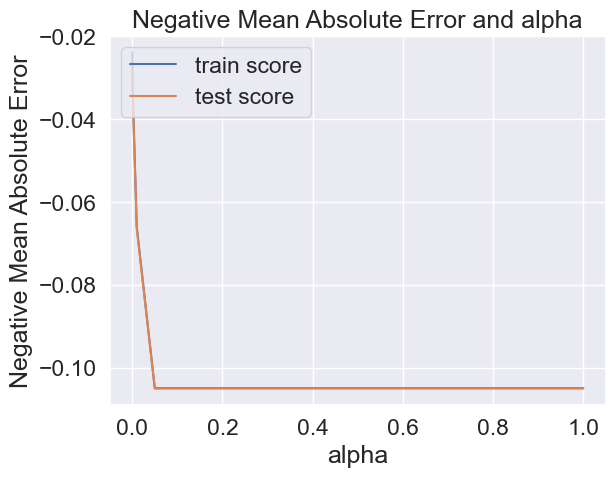

In [82]:
# Plotting test-train scores for each alpha value to identify a suitable alpha
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting the chart
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

##### We see the lowest error from alpha >= ~0.001. To achieve the desired bias & variance, we can choose the lowest alpha from this range i.e. 0.01. This will also ensure we have less no of coefficients & avoid both overfitting and underfitting

In [83]:
# Lets fit the lasso model using the alpha derived above - 0.01
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# Printing the lasso coefficients
print(lasso.sparse_coef_.size)
print(lasso.coef_)

9
[-0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.          0.001503
  0.          0.          0.          0.          0.         -0.
  0.          0.          0.          0.         -0.          0.
  0.          0.         -0.          0.         -0.          0.
 -0.          0.          0.         -0.          0.         -0.
  0.          0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.          0.          0.
  0.         -0.          0.         -0.         -0.          0.
 -0.         -0.          0.          0.          0.         -0.
 -0.         -0.         -0.          0.          0.          0.
  0.         -0.          0.          0.          0.         -0.
  0.          0.          0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.          0.          0.          0.
  0.         -0. 

#### Using Lasso Model of Regression, we have been able to get a model with 8 relevant predictor variables. However this might be too less variables, so we will try a model with multiple values of Alpha - 0.01, 0.0025 & 0.001 value of alpha
Lets check R-Square value for train & test data set of this model for further validation

In [84]:
# Lets fit the lasso model using the alpha derived above - 0.0001
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
print(lasso.sparse_coef_.size)
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

0.5416983442262348
9
0.5670599946744656


0.09105468110181071

In [85]:
# Lets fit the lasso model using the alpha derived above - 0.0001
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
print(lasso.sparse_coef_.size)
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

0.900173933885307
47
0.8873243643980688


0.04645189406184335

In [86]:
### Lets fit the lasso model using the alpha derived above - 0.0025
lasso = Lasso(alpha=0.003)
lasso.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
print(lasso.sparse_coef_.size)
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

0.8296459554020796
24
0.8317440276818532


0.056764087775189105

##### It is important to ensure we `choose the right value of Alpha` to ensure the model quality is good without any overfitting or underfitting

### As we can see above, 'Lasso model' with alpha 0.002 gave us -
1. `Desired R2 score on both train & test data`
2. `Choosing relevant predictor variables` by reducing the coefficient of others to 0
3. `Keeping the model simple` by not including too many predictor variables

Lets identify the predictor variables along with coefficients chosen by Lasso Model

In [87]:
lasso.intercept_

0.3141546207620708

In [88]:
# Lasso model predictor variables
lassoPredictors = list(lasso.coef_ )
lassoPredictors.insert(0, lasso.intercept_)
lassoPredictors = [round(x, 3) for x in lassoPredictors]
cols = X_train.columns
cols = cols.insert(0, "constant")
lassoPredictorsList = list(zip(cols, lassoPredictors))

lassoPredictorsDF = pd.DataFrame(lassoPredictorsList)
lassoPredictorsDF.columns = ['Variable', 'Coeff']
lassoPredictorsDF = lassoPredictorsDF.reindex(lassoPredictorsDF['Coeff'].abs().sort_values(ascending=False).index)

lassoPredictorsDF

Variable  Coeff
0                 constant  0.314
12               GrLivArea  0.187
4              OverallQual  0.147
8              TotalBsmtSF  0.072
176       FireplaceQu_none -0.033
..                     ...    ...
76         BldgType_2fmCon -0.000
77         BldgType_Duplex -0.000
78          BldgType_Twnhs -0.000
79         BldgType_TwnhsE -0.000
208  SaleCondition_Partial  0.000

[209 rows x 2 columns]

In [155]:
# Chose variables whose coefficients are non-zero
lasoPredictors = pd.DataFrame(lassoPredictorsDF[(lassoPredictorsDF['Coeff'] != 0)])

print(lasoPredictors.shape)
print(lasoPredictors)

(24, 2)
              Variable  Coeff
0             constant  0.314
12           GrLivArea  0.187
4          OverallQual  0.147
8          TotalBsmtSF  0.072
176   FireplaceQu_none -0.033
20          GarageArea  0.030
164       CentralAir_Y  0.028
132   Foundation_PConc  0.026
189      GarageQual_TA  0.020
149   BsmtFinType1_GLQ  0.019
171     KitchenQual_TA -0.016
126       ExterQual_TA -0.016
30         MSZoning_RL  0.016
177  GarageType_Attchd  0.015
138        BsmtQual_TA -0.013
201       SaleType_New  0.012
31         MSZoning_RM -0.011
123    MasVnrType_none -0.010
163       HeatingQC_TA -0.006
146    BsmtExposure_No -0.004
87     RoofStyle_Gable -0.004
184   GarageFinish_Unf -0.003
168   Electrical_SBrkr  0.003
152   BsmtFinType1_Unf -0.002


### Ridge Regression

In [90]:
# list of alphas to tune the model using regression
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 
                    0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)      

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [91]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=9]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.447669      0.039035         0.023036        0.008540      0.0001   
1       0.468021      0.019799         0.038086        0.015580       0.001   
2       0.429431      0.035779         0.066527        0.039232        0.01   
3       0.379135      0.036606         0.018292        0.002702        0.05   
4       0.434778      0.023623         0.030436        0.013489         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.028061          -0.033629          -0.030509   
1   {'alpha': 0.001}          -0.028053          -0.033622          -0.030501   
2    {'alpha': 0.01}          -0.027970          -0.033561          -0.030420   
3    {'alpha': 0.05}          -0.027655          -0.033363          -0.030130   
4     {'alpha': 0.1}          -0.027359          -0.033192          -0.029879   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.032080          -0.034402        -0.031736        0.002272   
1          -0.032058          -0.034388        -0.031724        0.002271   
2          -0.031865          -0.034249        -0.031613        0.002258   
3          -0.031327          -0.033720        -0.031239        0.002225   
4          -0.031037          -0.033223        -0.030938        0.002202   

   rank_test_score  split0_train_score  split1_train_score  \
0               23           -0.023049           -0.021200   
1               22           -0.023049           -0.021201   
2               21           -0.023055           -0.021208   
3               20           -0.023086           -0.021236   
4               18           -0.023134           -0.021271   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.022042           -0.022296           -0.021424   
1           -0.022042           -0.022296           -0.021426   
2           -0.022044           -0.022297           -0.021444   
3           -0.022057           -0.022324           -0.021529   
4           -0.022076           -0.022353           -0.021640   

   mean_train_score  std_train_score  
0         -0.022002         0.000657  
1         -0.022003         0.000657  
2         -0.022010         0.000654  
3         -0.022046         0.000645  
4         -0.022095         0.000638

In [92]:
#Print the best hyperparamer alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [93]:
ridge = Ridge(alpha=2)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.22644599e-02,  3.41328770e-02,  4.96455147e-02,  1.28480186e-01,
        1.06268024e-01,  1.21252568e-02,  1.13980255e-03,  1.01056425e-01,
        8.49391840e-02,  5.42596898e-02,  1.73703546e-02,  1.15102093e-01,
        2.87109096e-02,  9.36979616e-03,  1.88751304e-02,  2.07464781e-02,
        4.91092824e-03, -1.60665244e-02,  1.73130128e-02,  5.55665993e-02,
        1.67781327e-02,  1.01070609e-02,  6.05006623e-03,  1.21848075e-03,
        3.54533228e-02,  1.69588962e-02, -6.73817103e-02,  4.19072892e-02,
        5.66706659e-02,  4.52315518e-02,  3.73776527e-02,  1.28060703e-02,
        1.59563694e-02,  3.90710700e-03, -1.12117876e-02, -1.63189411e-02,
       -3.71262646e-03,  9.75228272e-03, -1.03231342e-02, -5.42751629e-03,
       -6.94902493e-03, -1.45624196e-03, -1.56812019e-03, -8.20972101e-03,
       -2.23834316e-02,  2.04452475e-03,  1.88313621e-02, -3.23540209e-03,
        3.65368786e-02, -2.32962087e-02,  1.40159912e-03, -2.94401734e-02,
       -5.01813410e-02, -

In [94]:
# predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9376317575448962
0.9052992332308838


In [95]:
#RMSE value
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

0.04258583492519668

In [96]:
# Going to round the Ridge Coefficients to 3 decimals
ridgePredictors = list(ridge.coef_ )
ridgePredictors.insert(0, ridge.intercept_)
ridgePredictors = [round(x, 3) for x in ridgePredictors]
cols = X_train.columns
cols = cols.insert(0, "constant")
ridgePredictorsList = list(zip(cols, ridgePredictors))

ridgePredictorsDF = pd.DataFrame(ridgePredictorsList)
ridgePredictorsDF.columns = ['Variable', 'Coeff']
ridgePredictorsDF = ridgePredictorsDF.reindex(lassoPredictorsDF['Coeff'].abs().sort_values(ascending=False).index)

ridgePredictorsDF

Variable  Coeff
0                 constant  0.138
12               GrLivArea  0.115
4              OverallQual  0.128
8              TotalBsmtSF  0.101
176       FireplaceQu_none -0.005
..                     ...    ...
182        GarageType_none -0.005
181      GarageType_Detchd  0.009
156       BsmtFinType2_LwQ -0.002
157       BsmtFinType2_Rec -0.011
208  SaleCondition_Partial  0.023

[209 rows x 2 columns]

In [97]:
## Removing the coefficients with 0 values after rounding off
predRFE = pd.DataFrame(ridgePredictorsDF[(ridgePredictorsDF['Coeff'] != 0)])
predRFE

Variable  Coeff
0                 constant  0.138
12               GrLivArea  0.115
4              OverallQual  0.128
8              TotalBsmtSF  0.101
176       FireplaceQu_none -0.005
..                     ...    ...
182        GarageType_none -0.005
181      GarageType_Detchd  0.009
156       BsmtFinType2_LwQ -0.002
157       BsmtFinType2_Rec -0.011
208  SaleCondition_Partial  0.023

[198 rows x 2 columns]

In [98]:
# We are eventually left with 199 predictor variables in the Ridge Model

## Comparing Lasso & Ridge Regression Output
#### We see that the RSquare value is pretty good with Ridge regression. But it is also worth noting that -
1. Difference between train & test R-Square is higher in Ridge than Lasso
2. Ridge model is much more complex than Lasso as Ridge does not do feature elimination

As we know, simpler models are the best ones. 

##### Considering all these points, we should `consider Lasso model of regression here` and conside that our final model for this use case. Note that the model can be even further refined by checking model detailed stats and using VIF to remove collinearity

In [106]:
# Printing the final lasso predictor variables
print(lasoPredictors.shape)
print(lasoPredictors)

(24, 2)
              Variable  Coeff
0             constant  0.314
12           GrLivArea  0.187
4          OverallQual  0.147
8          TotalBsmtSF  0.072
176   FireplaceQu_none -0.033
20          GarageArea  0.030
164       CentralAir_Y  0.028
132   Foundation_PConc  0.026
189      GarageQual_TA  0.020
149   BsmtFinType1_GLQ  0.019
171     KitchenQual_TA -0.016
126       ExterQual_TA -0.016
30         MSZoning_RL  0.016
177  GarageType_Attchd  0.015
138        BsmtQual_TA -0.013
201       SaleType_New  0.012
31         MSZoning_RM -0.011
123    MasVnrType_none -0.010
163       HeatingQC_TA -0.006
146    BsmtExposure_No -0.004
87     RoofStyle_Gable -0.004
184   GarageFinish_Unf -0.003
168   Electrical_SBrkr  0.003
152   BsmtFinType1_Unf -0.002


#### Before concluding Lasso's regression model, lets validate the linear regression assumptions are satisfied

In [100]:
# prediction on the test set(Using R2)
y_train_pred = lasso.predict(X_train)

# Calculate residual
res = y_train - y_train_pred

Text(0.5, 0, 'Errors')

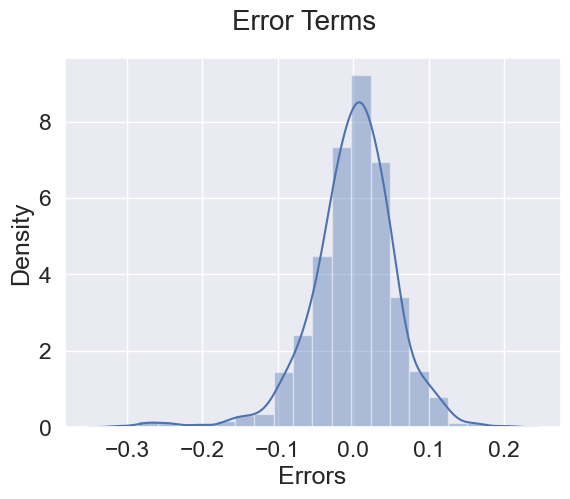

In [101]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

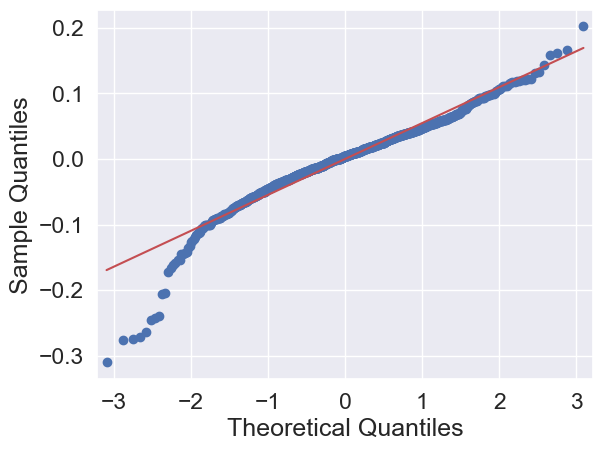

In [104]:
# We can also check q-q plot of residuals
sm.qqplot(res, line='r')
plt.show()

In [111]:
lasoPredictors['Variable']

0               constant
12             GrLivArea
4            OverallQual
8            TotalBsmtSF
176     FireplaceQu_none
20            GarageArea
164         CentralAir_Y
132     Foundation_PConc
189        GarageQual_TA
149     BsmtFinType1_GLQ
171       KitchenQual_TA
126         ExterQual_TA
30           MSZoning_RL
177    GarageType_Attchd
138          BsmtQual_TA
201         SaleType_New
31           MSZoning_RM
123      MasVnrType_none
163         HeatingQC_TA
146      BsmtExposure_No
87       RoofStyle_Gable
184     GarageFinish_Unf
168     Electrical_SBrkr
152     BsmtFinType1_Unf
Name: Variable, dtype: object

In [154]:
# Removing constant from the predictors
lasoPredictors1 = lasoPredictors1.tail(-1)
lasoPredictors1

Variable  Coeff
4          OverallQual  0.147
8          TotalBsmtSF  0.072
176   FireplaceQu_none -0.033
20          GarageArea  0.030
164       CentralAir_Y  0.028
132   Foundation_PConc  0.026
189      GarageQual_TA  0.020
149   BsmtFinType1_GLQ  0.019
171     KitchenQual_TA -0.016
126       ExterQual_TA -0.016
30         MSZoning_RL  0.016
177  GarageType_Attchd  0.015
138        BsmtQual_TA -0.013
201       SaleType_New  0.012
31         MSZoning_RM -0.011
123    MasVnrType_none -0.010
163       HeatingQC_TA -0.006
146    BsmtExposure_No -0.004
87     RoofStyle_Gable -0.004
184   GarageFinish_Unf -0.003
168   Electrical_SBrkr  0.003
152   BsmtFinType1_Unf -0.002

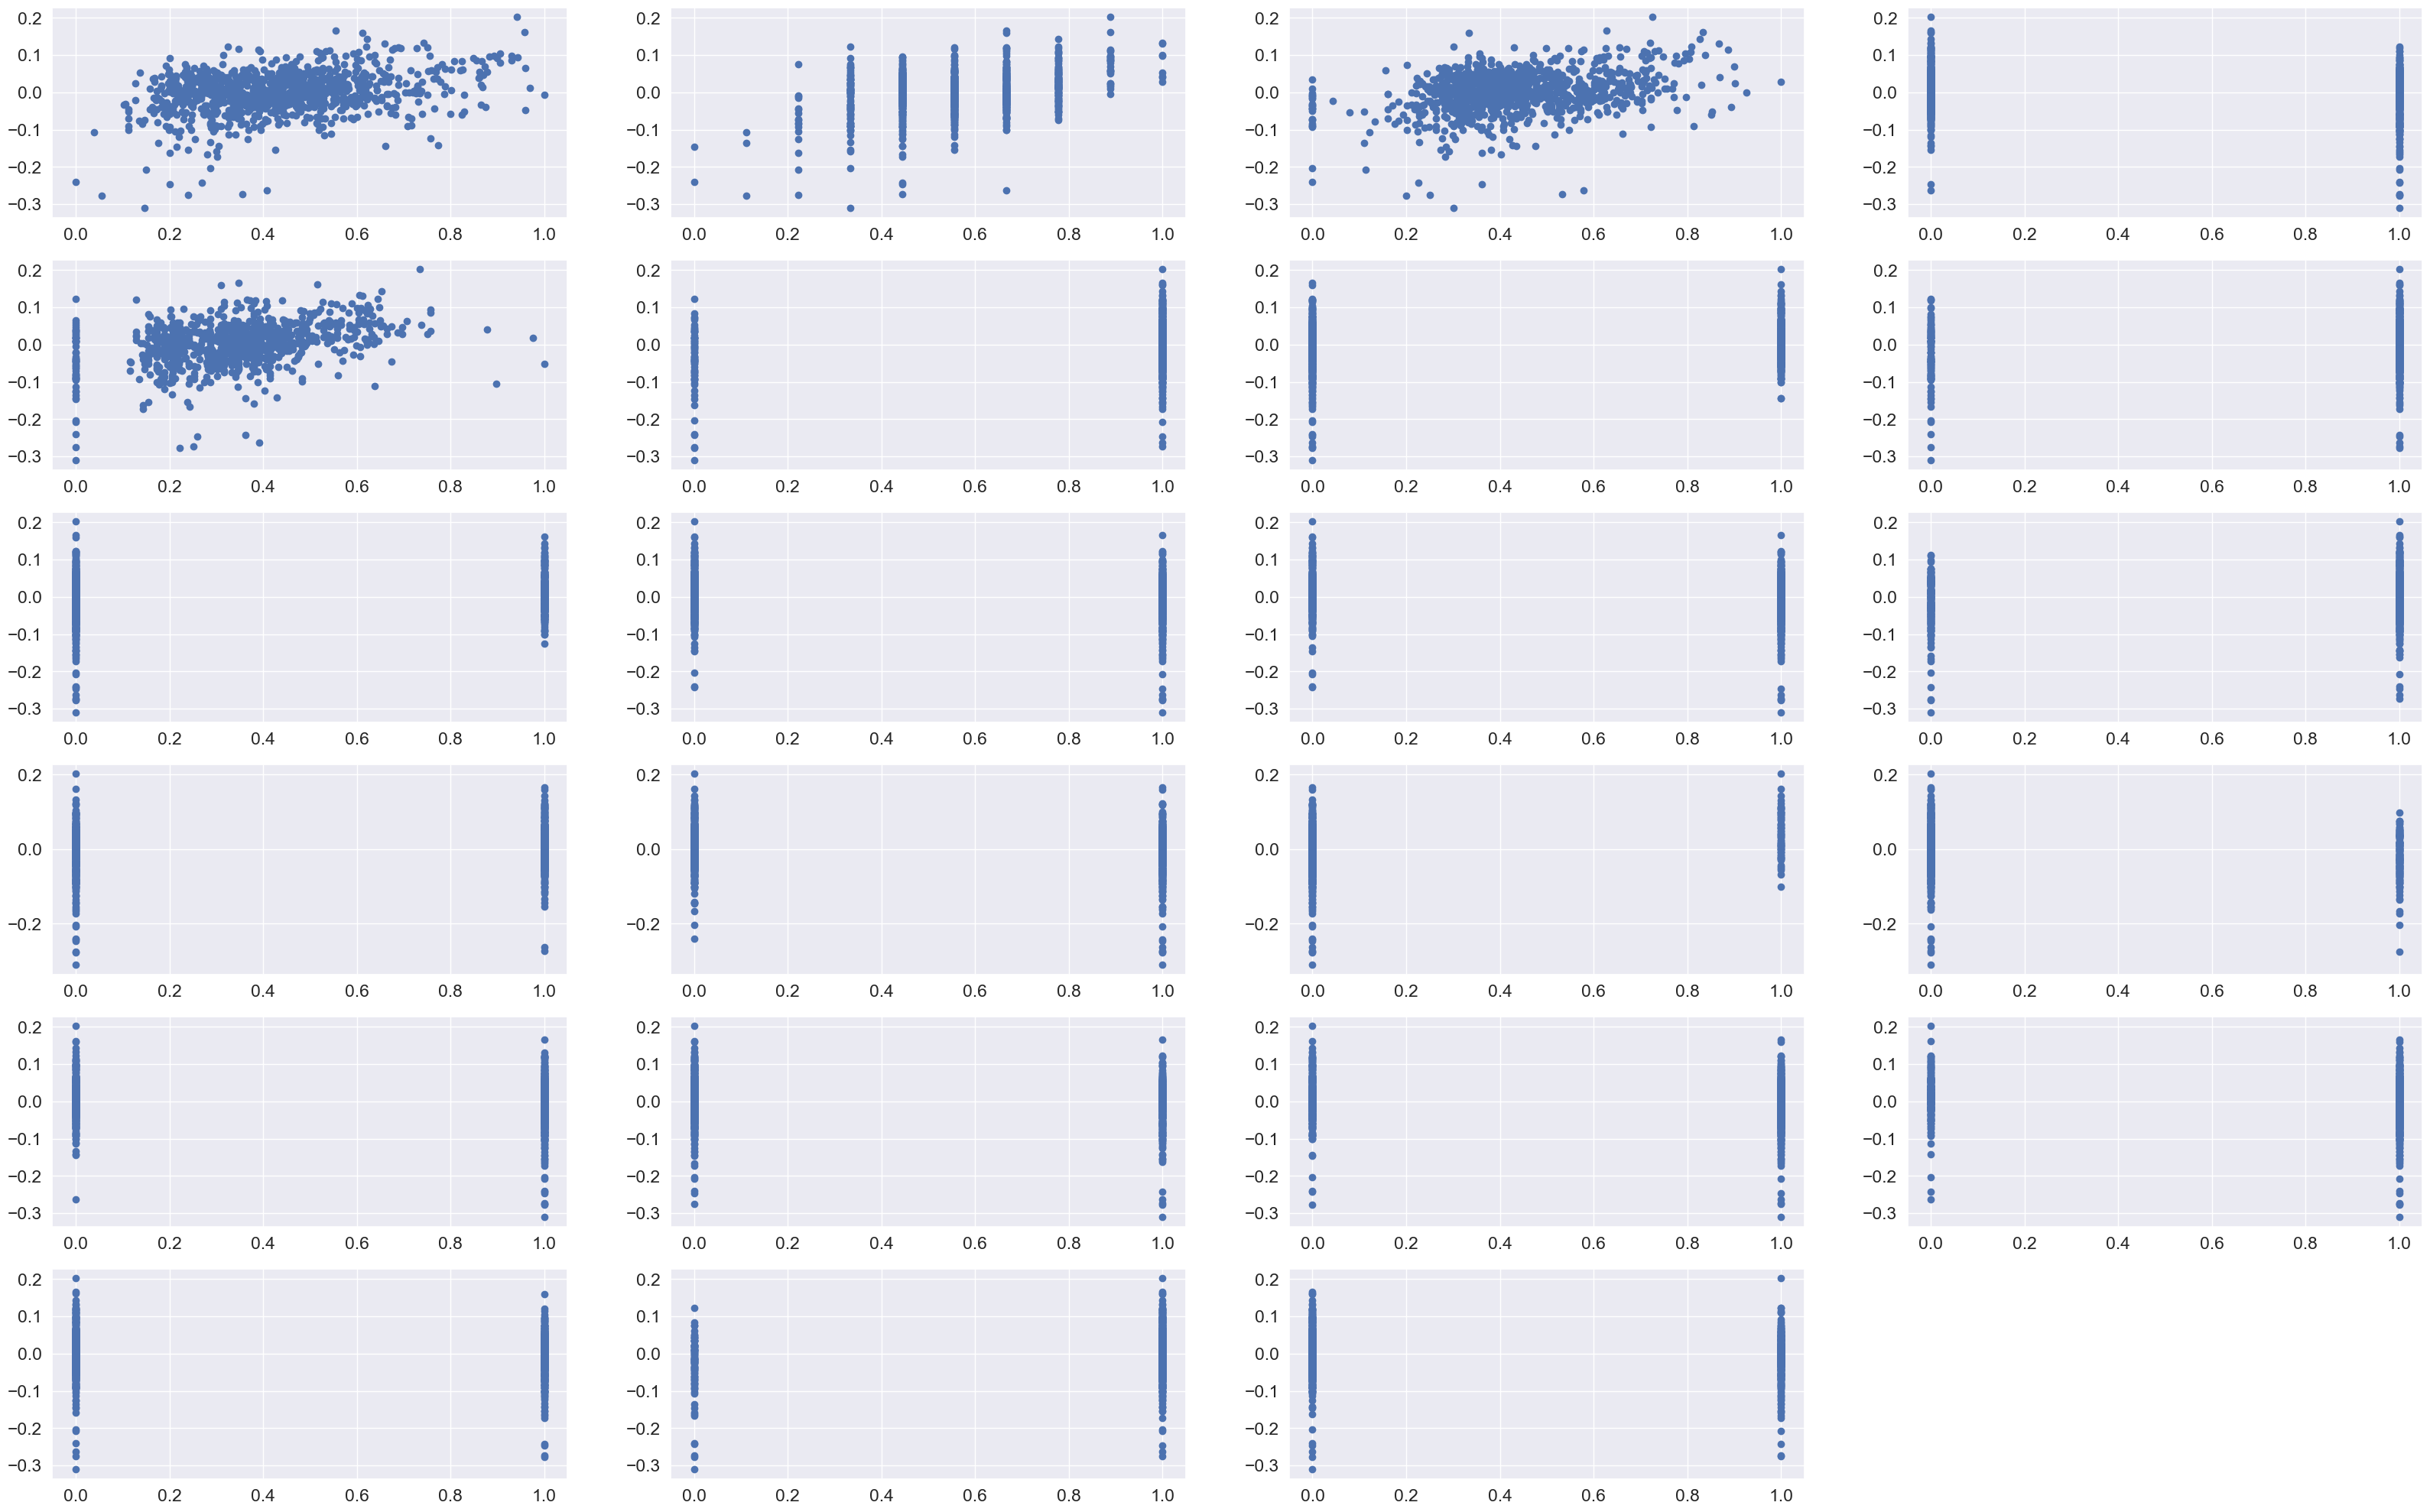

In [153]:
plt.figure(figsize=(40, 25))
i=1
for var in lasoPredictors1['Variable']:
    plt.subplot(6,4,i)
    #print(var)
    plt.scatter(X_train[var], res)
    i = i+1

plt.show()

In [ ]:
#### We observed that linear regression assumptions are satisfied with our chosen model

In [ ]:
# Lets formulate the linear regression equation
lasoPredictors.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17' , 'x18' , 'x19' , 'x20' , 'x21' , 'x22' , 'x23']), inplace = True) 
lasoPredictors

#### We can clearly see that some predictor variables have higher effect on SalePrice as compared to others. We can see that the equation of our best fitted line is:

SalePrice = 0.314 + (0.187 * GrLivArea) + (0.147 * OverallQual) + (0.072 * TotalBsmtSF) + (-0.033 * FireplaceQu_none) + (0.03 * GarageArea) + (0.028 * CentralAir_Y) + (0.026 * Foundation_PConc) + (0.02 * GarageQual_TA) + (0.019 * BsmtFinType1_GLQ) + (-0.016 * KitchenQual_TA) + (-0.016 * ExterQual_TA) + (0.016 * MSZoning_RL) + (0.015 * GarageType_Attchd) + (-0.013 * BsmtQual_TA) + (0.012 * SaleType_New) + (-0.011 * MSZoning_RM) + (-0.01 * MasVnrType_none) + (-0.006 * HeatingQC_TA) + (-0.004 * BsmtExposure_No) + (-0.004 * RoofStyle_Gable) + (-0.003 * GarageFinish_Unf) + (0.003 * Electrical_SBrkr) + (-0.002 * BsmtFinType1_Unf)

### Final Model Summary

#### Lasso Regression
   - R-Square on Train dataset ** : 0.830
   - R-Square on Test dataset : 0.832
   - Mean Square Error : 0.0568
   - Alpha (Hyperparameter) Selected : 0.003

   
#### Variables impacting rental bikes count are :
- `GrLivArea` : Above grade (ground) living area square feet
- `OverallQual` : Overall material and finish of the house
- `TotalBsmtSF` : Total square feet of basement area
- `GarageArea` : Size of garage in square feet
- `CentralAir_Y` : Central air conditioning Present
- `FireplaceQu_none` : Absence of a fireplace. Negative coefficient indicates that absence of fireplaces reduces the SalePrice
